<a href="https://colab.research.google.com/github/athirakmenon/FINAL-PROJECT/blob/main/Final_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The** **Categorization** **and** **Quantification** **of** **Pulsars** **Using** **ATNF** **Pulsar** **Catalogue** **Data**.

This study explores how observational data can effectively categorize and quantify the diverse groups of pulsars in the universe.

*   Download and preprocess data from the ATNF Pulsar Catalogue.
*  Implement clustering algorithms to categorize different types of pulsars.

*  Identify distinct groups of pulsars and analyze their properties.
*    Validate the results using known pulsar characteristics and literature






In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **IMPORTING NECESSARY** **LIBRARIES**

In [3]:
# Importing  necessary libraries for data analysis, clustering, and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from matplotlib.patches import Ellipse
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')
import time

# **DATA** **PREPROCESSING**

The data is loaded, relevant columns are converted to numeric types, and unnecessary columns are removed. P0 and P1 are log-transformed. Rows with invalid or missing values in significant columns are filtered out, and the index is reset to maintain consistency. A correlation matrix is computed and displayed to analyze the relationships between features. Additionally, the mathematical relationships among the parameters are confirmed:

𝑃
0
=
1/
𝐹
0


​
  and

𝑃
1
=
−
𝑃
0^2
⋅
𝐹
1


In [4]:
# Load the dataset, skipping irrelevant rows and handling missing values
data = '/content/drive/MyDrive/Neutronstars.csv'
n_data= pd.read_csv(data, sep=';', skiprows=3,skipfooter=6, na_values=['*'])

n_data

#        NAME        PSRJ        P0            P1          F0  \
0        NaN         NaN         NaN       (s)           NaN        (Hz)   
1        1.0  J0002+6216  J0002+6216  0.115364  5.970000e-15    8.668248   
2        2.0  J0006+1834  J0006+1834  0.693748  2.100000e-15    1.441446   
3        3.0  J0007+7303  J0007+7303  0.315873  3.600000e-13    3.165827   
4        4.0    J0011+08    J0011+08  2.552870           NaN    0.391716   
...      ...         ...         ...       ...           ...         ...   
3530  3530.0    B2351+61  J2354+6155  0.944784  1.630000e-14    1.058443   
3531  3531.0    J2354-22    J2354-22  0.557996           NaN    1.792128   
3532  3532.0  J2355+0051  J2355+0051  0.003719  3.220000e-21  268.890043   
3533  3533.0  J2355+1523  J2355+1523  1.094396  4.190000e-16    0.913746   
3534  3534.0  J2355+2246  J2355+2246  1.840986  3.780000e-15    0.543187   

              F1         DM         RM     W50  S1400  BINARY   DIST  \
0         (s^-2)  (cm^-3pc)  (radm^-2)    (ms)  (mJy)  (type)  (kpc)   
1     -4.484e-13     218.60        NaN     NaN   0.02     NaN  6.357   
2     -4.357e-15      11.40     -20.00  82.000    NaN     NaN  0.860   
3     -3.612e-12        NaN        NaN     NaN    NaN     NaN  1.400   
4            NaN      24.90        NaN  28.000    NaN     NaN  5.399   
...          ...        ...        ...     ...    ...     ...    ...   
3530  -1.822e-14      94.66     -75.90  10.400   5.00     NaN  2.400   
3531         NaN       9.90        NaN   9.000    NaN     NaN  1.108   
3532  -2.330e-16      11.15      -0.10     NaN   0.16    ELL1  0.958   
3533  -3.500e-16      26.00        NaN     NaN    NaN     NaN  3.444   
3534  -1.115e-15      23.10        NaN  68.000    NaN     NaN  2.163   

           AGE  Unnamed: 14  
0         (Yr)          NaN  
1     3.06e+05          NaN  
2     5.24e+06          NaN  
3     1.39e+04          NaN  
4          NaN          NaN  
...        ...          ...  
3530  9.20e+05          NaN  
3531       NaN          NaN  
3532  1.83e+10          NaN  
3533  4.14e+07          NaN  
3534  7.72e+06          NaN  

[3535 rows x 15 columns]

In [5]:
#Checking for null values
n_data.isnull().sum()

#                 1
NAME              1
PSRJ              1
P0               57
P1              867
F0               57
F1              866
DM              119
RM             1996
W50             914
S1400          1095
BINARY         3130
DIST             75
AGE             926
Unnamed: 14    3535
dtype: int64

In [6]:
# Dropping unnecessary columns: '#', 'Unnamed: 14'
new_data =n_data.iloc[:, 1:-1].drop(index=0).reset_index(drop=True)
new_data

NAME        PSRJ        P0            P1          F0          F1  \
0     J0002+6216  J0002+6216  0.115364  5.970000e-15    8.668248  -4.484e-13   
1     J0006+1834  J0006+1834  0.693748  2.100000e-15    1.441446  -4.357e-15   
2     J0007+7303  J0007+7303  0.315873  3.600000e-13    3.165827  -3.612e-12   
3       J0011+08    J0011+08  2.552870           NaN    0.391716         NaN   
4     J0012+5431  J0012+5431  3.025301  1.280000e-16    0.330546  -1.400e-17   
...          ...         ...       ...           ...         ...         ...   
3529    B2351+61  J2354+6155  0.944784  1.630000e-14    1.058443  -1.822e-14   
3530    J2354-22    J2354-22  0.557996           NaN    1.792128         NaN   
3531  J2355+0051  J2355+0051  0.003719  3.220000e-21  268.890043  -2.330e-16   
3532  J2355+1523  J2355+1523  1.094396  4.190000e-16    0.913746  -3.500e-16   
3533  J2355+2246  J2355+2246  1.840986  3.780000e-15    0.543187  -1.115e-15   

          DM      RM     W50 S1400 BINARY   DIST       AGE  
0     218.60     NaN     NaN  0.02    NaN  6.357  3.06e+05  
1      11.40  -20.00  82.000   NaN    NaN  0.860  5.24e+06  
2        NaN     NaN     NaN   NaN    NaN  1.400  1.39e+04  
3      24.90     NaN  28.000   NaN    NaN  5.399       NaN  
4     131.30     NaN     NaN   NaN    NaN  5.425  3.74e+08  
...      ...     ...     ...   ...    ...    ...       ...  
3529   94.66  -75.90  10.400  5.00    NaN  2.400  9.20e+05  
3530    9.90     NaN   9.000   NaN    NaN  1.108       NaN  
3531   11.15   -0.10     NaN  0.16   ELL1  0.958  1.83e+10  
3532   26.00     NaN     NaN   NaN    NaN  3.444  4.14e+07  
3533   23.10     NaN  68.000   NaN    NaN  2.163  7.72e+06  

[3534 rows x 13 columns]

In [7]:
#checking data types
print(new_data.dtypes)

NAME       object
PSRJ       object
P0         object
P1        float64
F0         object
F1         object
DM         object
RM         object
W50        object
S1400      object
BINARY     object
DIST       object
AGE        object
dtype: object


In [8]:
# Convert specific columns to numeric data types
# Columns that cannot be converted (due to invalid data) will have their values coerced to NaN.

columns_to_convert = ['P0', 'F0', 'F1', 'DM', 'RM', 'W50', 'S1400', 'DIST', \
                      'AGE']
# Iterate over each specified column and convert its data type to numeric.
for col in columns_to_convert:
    new_data[col] = pd.to_numeric(new_data[col], errors='coerce')

In [9]:
#checking converted dtypes
print(new_data.dtypes)

NAME       object
PSRJ       object
P0        float64
P1        float64
F0        float64
F1        float64
DM        float64
RM        float64
W50       float64
S1400     float64
BINARY     object
DIST      float64
AGE       float64
dtype: object


In [10]:
# summary statistics for all numerical columns in the dataset
new_data.describe().transpose()

count          mean           std           min           25%  \
P0     3477.0  8.379762e-01  1.256985e+00  1.396000e-03  1.824950e-01   
P1     2668.0  3.941206e-13  1.101897e-11 -2.760000e-15  8.280000e-17   
F0     3477.0  4.537562e+01  1.106748e+02  4.248900e-02  9.770360e-01   
F1     2668.0 -7.852899e-13  9.781081e-12 -3.775000e-10 -1.902250e-14   
DM     3415.0  2.070177e+02  2.075401e+02  2.380000e+00  5.248500e+01   
RM     1538.0 -8.770117e+00  1.770387e+03 -6.608000e+04 -4.200000e+01   
W50    2620.0  2.512631e+01  3.852572e+01  3.500000e-02  6.900000e+00   
S1400  2439.0  2.077175e+00  2.316205e+01  0.000000e+00  1.300000e-01   
DIST   3459.0  6.074056e+00  6.729197e+00  9.300000e-02  2.371000e+00   
AGE    2608.0  1.749508e+09  3.246446e+10  2.180000e+02  1.600000e+06   

                50%           75%           max  
P0     4.996950e-01  1.023504e+00  2.353538e+01  
P1     1.260000e-15  6.227500e-15  5.490000e-10  
F0     2.001221e+00  5.479608e+00  7.163556e+02  
F1    -2.246000e-15 -4.662000e-16  4.660000e-14  
DM     1.347000e+02  2.935700e+02  1.778000e+03  
RM     1.000000e+01  9.730000e+01  1.325300e+04  
W50    1.400000e+01  2.900000e+01  6.599000e+02  
S1400  3.200000e-01  9.000000e-01  1.050000e+03  
DIST   4.500000e+00  7.215000e+00  6.026100e+01  
AGE    9.190000e+06  8.487500e+07  1.640000e+12

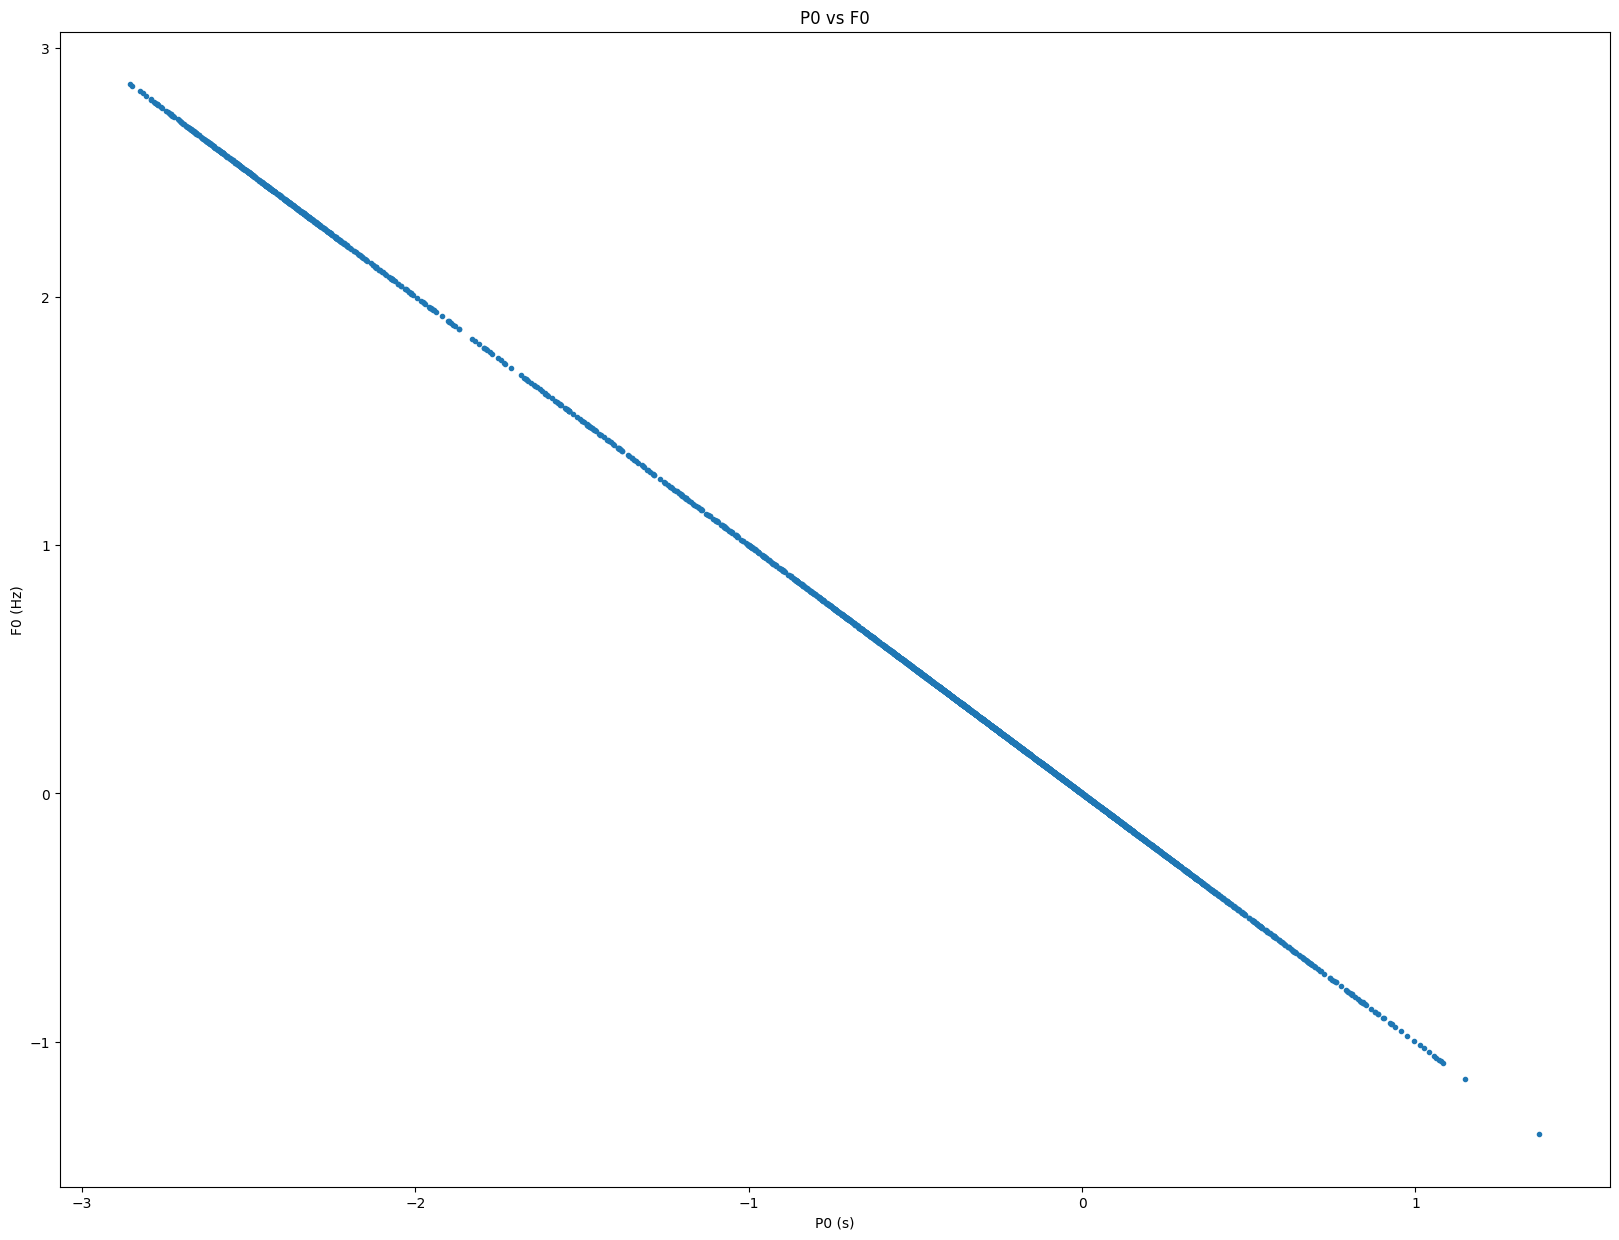

In [11]:
# Create a scatter plot to visualize the relationship between 'P0' and 'F0'
plt.figure(figsize=(20, 15))
plt.scatter(np.log10(new_data['P0']),np.log10( new_data['F0']), marker='.')
plt.title('P0 vs F0')
plt.xlabel('P0 (s)')
plt.ylabel('F0 (Hz)')
plt.show()

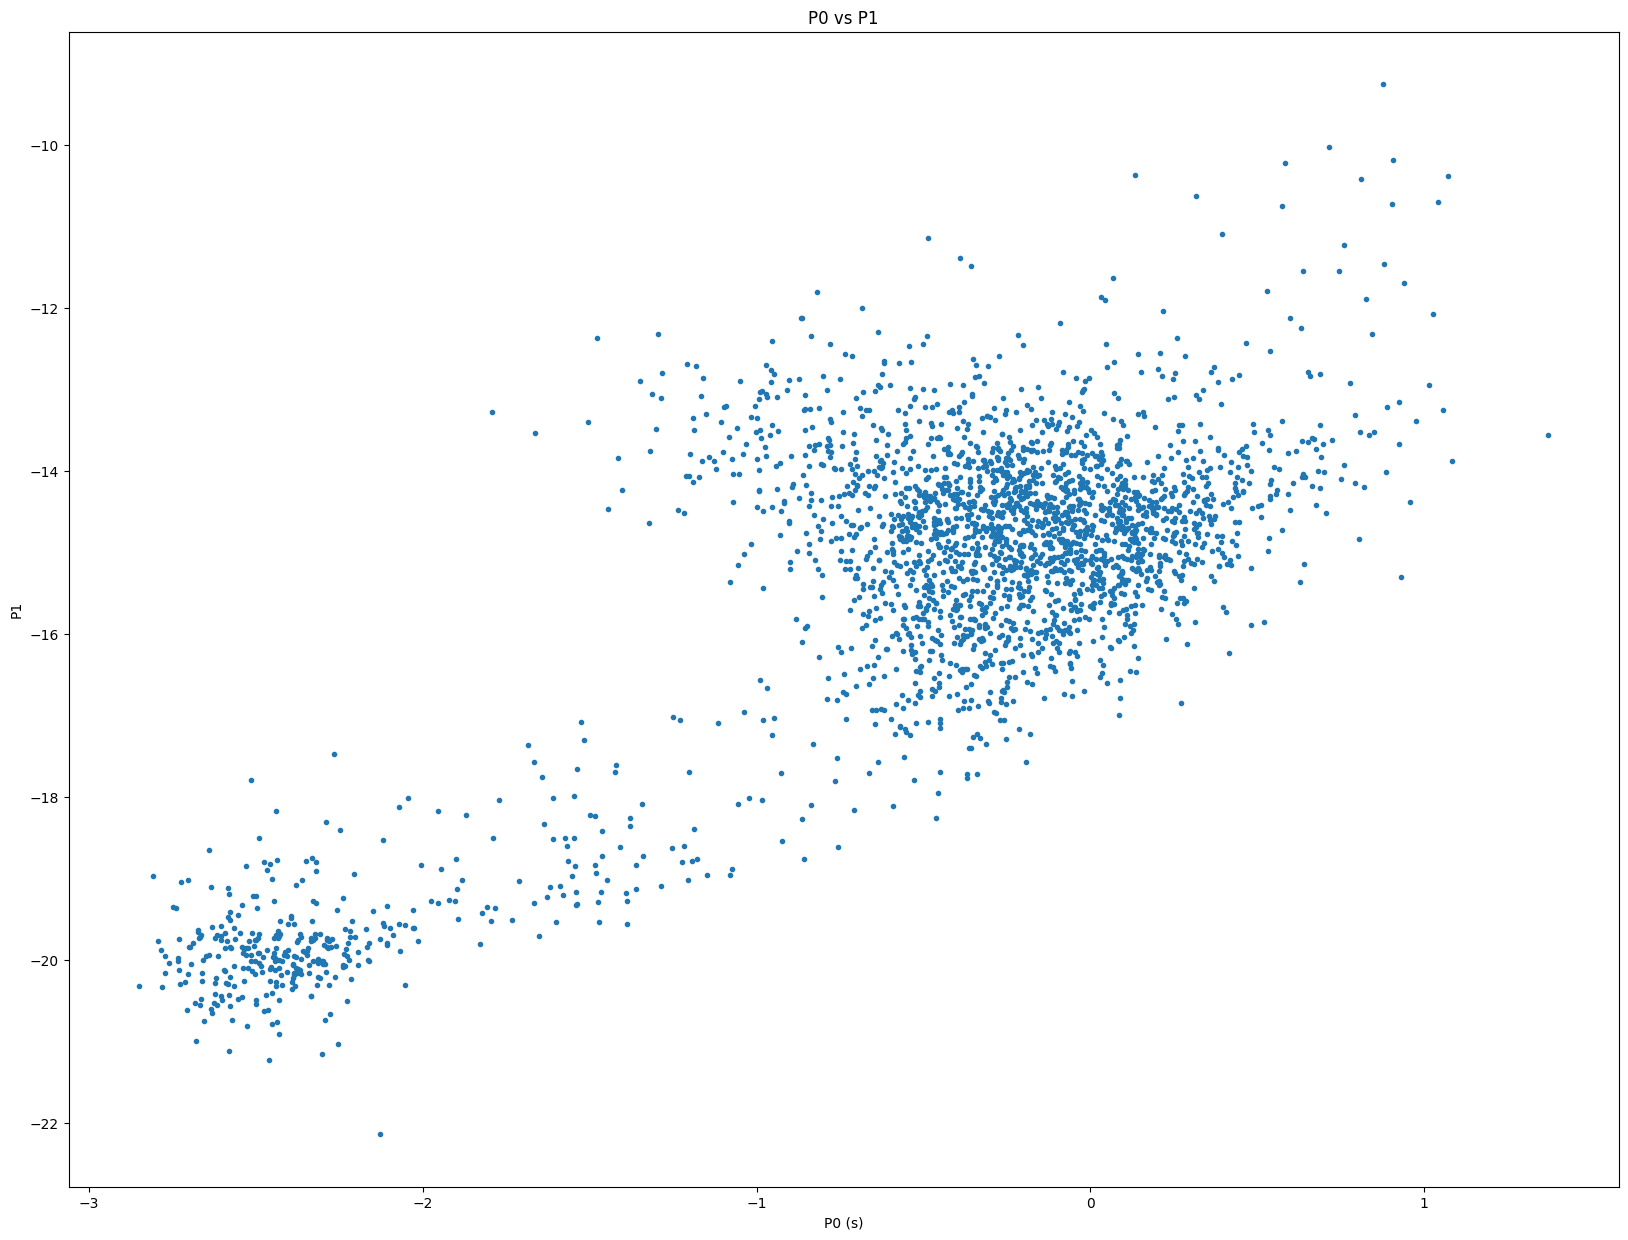

In [12]:
# Create a scatter plot to visualize the relationship between 'P0' and 'P1'
plt.figure(figsize=(20, 15))
plt.scatter(np.log10(new_data['P0']),np.log10(new_data['P1']),marker='.')
plt.title('P0 vs P1')
plt.xlabel('P0 (s)')
plt.ylabel('P1')
plt.show()

In [13]:
# Droping rows containing null values for P0, P1, S1400 and DM
filtered_data=new_data.dropna(subset=['P0','P1','S1400','DM'])

# filtering out the non positive P1 values
filtered_data = filtered_data[(filtered_data['P1'] > 0)]

filtered_data

NAME        PSRJ        P0            P1          F0  \
0     J0002+6216  J0002+6216  0.115364  5.970000e-15    8.668248   
5       B0011+47  J0014+4746  1.240699  5.640000e-16    0.805997   
6     J0021-0909  J0021-0909  2.314131  1.040000e-15    0.432128   
7     J0023+0923  J0023+0923  0.003050  1.140000e-20  327.847021   
35    J0026+6320  J0026+6320  0.318358  1.510000e-16    3.141120   
...          ...         ...       ...           ...         ...   
3517  J2333+6145  J2333+6145  0.756899  1.180000e-15    1.321180   
3519    B2334+61  J2337+6151  0.495370  1.930000e-13    2.018694   
3524  J2346-0609  J2346-0609  1.181463  1.360000e-15    0.846408   
3529    B2351+61  J2354+6155  0.944784  1.630000e-14    1.058443   
3531  J2355+0051  J2355+0051  0.003719  3.220000e-21  268.890043   

                F1      DM      RM   W50  S1400 BINARY    DIST           AGE  
0    -4.484000e-13  218.60     NaN   NaN   0.02    NaN   6.357  3.060000e+05  
5    -3.667000e-16   30.41  -15.56  88.7   3.00    NaN   1.776  3.480000e+07  
6    -1.940000e-16   25.20  -15.00  23.8   0.13    NaN  25.000  3.530000e+07  
7    -1.228000e-15   14.32   -5.10   NaN   0.73   ELL1   1.818  4.230000e+09  
35   -1.486000e-15  245.06 -294.00   8.1   1.00    NaN   6.619  3.350000e+07  
...            ...     ...     ...   ...    ...    ...     ...           ...  
3517 -2.053000e-15  125.00     NaN  23.0   0.47    NaN   2.729  1.020000e+07  
3519 -7.883000e-13   58.41 -100.00  14.5   1.40    NaN   0.700  4.060000e+04  
3524 -9.765000e-16   22.50   -5.00  51.0   2.00    NaN   3.500  1.370000e+07  
3529 -1.822000e-14   94.66  -75.90  10.4   5.00    NaN   2.400  9.200000e+05  
3531 -2.330000e-16   11.15   -0.10   NaN   0.16   ELL1   0.958  1.830000e+10  

[2058 rows x 13 columns]

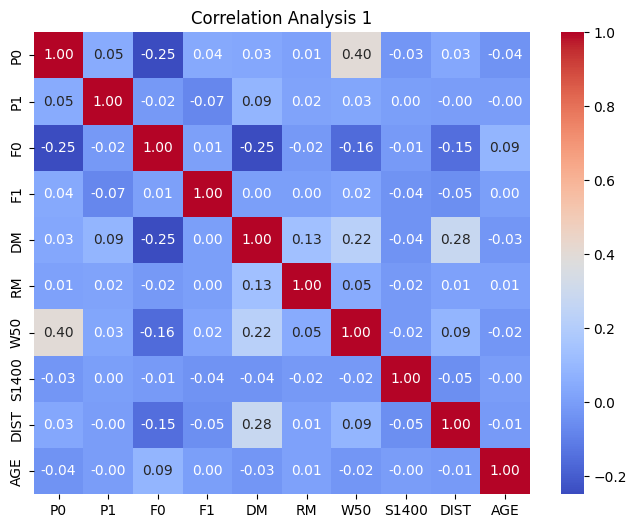

In [14]:
# Selecting features for checking correlation after removing null and non positive values
data_cor_1 = filtered_data[['P0', 'P1', 'F0', 'F1', 'DM', 'RM', 'W50',
                            'S1400', 'DIST', 'AGE']]

# Compute the correlation matrix.
corr_matrix_1 = data_cor_1.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))  # Set the size of the figure

# Create a heatmap with annotations showing correlation coefficients
sns.heatmap(corr_matrix_1, annot=True, cmap='coolwarm', fmt='.2f')

# Add a title to the heatmap
plt.title('Correlation Analysis 1')

# Display the heatmap plot
plt.show()


In [15]:
# Apply log transformation to 'P0' and 'P1' and store results in new columns
filtered_data['log_P0'] = np.log10(filtered_data['P0'])
filtered_data['log_P1'] = np.log10(filtered_data['P1'])

# Reset the index of the DataFrame
filtered_data = filtered_data.reset_index(drop=True)

# Display the updated DataFrame
filtered_data

NAME        PSRJ        P0            P1          F0  \
0     J0002+6216  J0002+6216  0.115364  5.970000e-15    8.668248   
1       B0011+47  J0014+4746  1.240699  5.640000e-16    0.805997   
2     J0021-0909  J0021-0909  2.314131  1.040000e-15    0.432128   
3     J0023+0923  J0023+0923  0.003050  1.140000e-20  327.847021   
4     J0026+6320  J0026+6320  0.318358  1.510000e-16    3.141120   
...          ...         ...       ...           ...         ...   
2053  J2333+6145  J2333+6145  0.756899  1.180000e-15    1.321180   
2054    B2334+61  J2337+6151  0.495370  1.930000e-13    2.018694   
2055  J2346-0609  J2346-0609  1.181463  1.360000e-15    0.846408   
2056    B2351+61  J2354+6155  0.944784  1.630000e-14    1.058443   
2057  J2355+0051  J2355+0051  0.003719  3.220000e-21  268.890043   

                F1      DM      RM   W50  S1400 BINARY    DIST           AGE  \
0    -4.484000e-13  218.60     NaN   NaN   0.02    NaN   6.357  3.060000e+05   
1    -3.667000e-16   30.41  -15.56  88.7   3.00    NaN   1.776  3.480000e+07   
2    -1.940000e-16   25.20  -15.00  23.8   0.13    NaN  25.000  3.530000e+07   
3    -1.228000e-15   14.32   -5.10   NaN   0.73   ELL1   1.818  4.230000e+09   
4    -1.486000e-15  245.06 -294.00   8.1   1.00    NaN   6.619  3.350000e+07   
...            ...     ...     ...   ...    ...    ...     ...           ...   
2053 -2.053000e-15  125.00     NaN  23.0   0.47    NaN   2.729  1.020000e+07   
2054 -7.883000e-13   58.41 -100.00  14.5   1.40    NaN   0.700  4.060000e+04   
2055 -9.765000e-16   22.50   -5.00  51.0   2.00    NaN   3.500  1.370000e+07   
2056 -1.822000e-14   94.66  -75.90  10.4   5.00    NaN   2.400  9.200000e+05   
2057 -2.330000e-16   11.15   -0.10   NaN   0.16   ELL1   0.958  1.830000e+10   

        log_P0     log_P1  
0    -0.937930 -14.224026  
1     0.093666 -15.248721  
2     0.364388 -14.982967  
3    -2.515700 -19.943095  
4    -0.497084 -15.821023  
...        ...        ...  
2053 -0.120962 -14.928118  
2054 -0.305070 -12.714443  
2055  0.072420 -14.866461  
2056 -0.024667 -13.787812  
2057 -2.429574 -20.492144  

[2058 rows x 15 columns]

# **UNSUPERVISED MACHINE LEARNING MODELS**

In this part three unsupervised algorithm  will be implemented in the pre processed dataset.

1.  K Means Clustering
2.  Hierarchical clustering
1.  Guassian Mixture Model





### **K**-**MEANS** **CLUSTERING** **WITH** **2** **FEATURES**

In [16]:
#selected features for unsupervised learning
X =filtered_data[['log_P0','log_P1']]

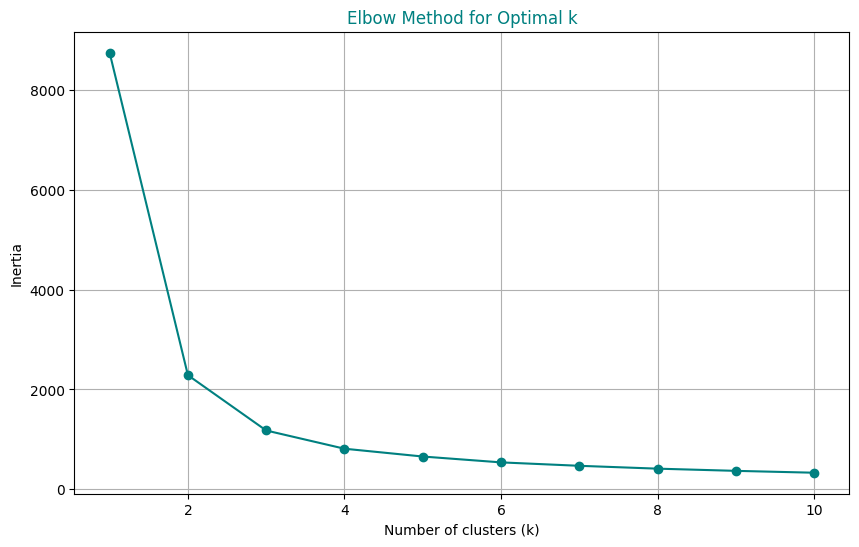

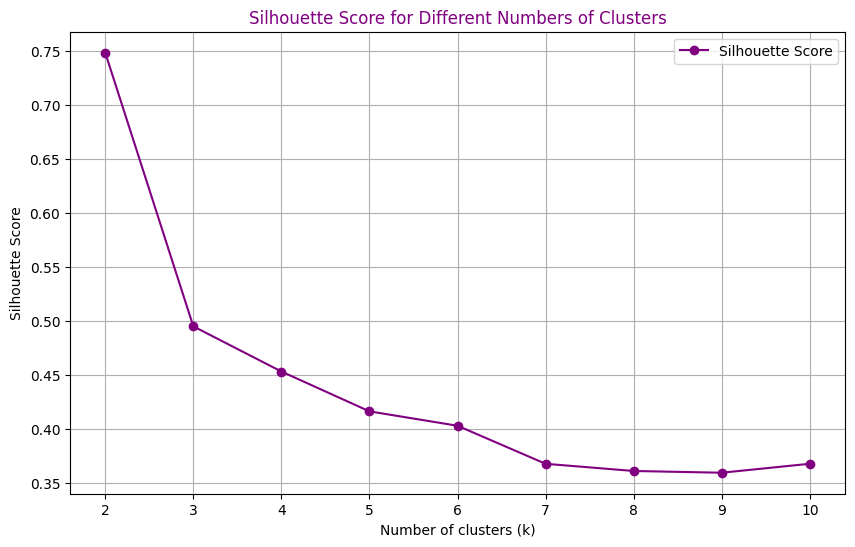

In [17]:
#looking for optimal K values by using the Elbow method and Silhouette scores
K = range(1, 11)
inertia = []
silhouette_scores = []

# Elbow Method
for k in K:
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    # Store the inertia value (sum of squared distances to closest centroid)
    inertia.append(kmeans.inertia_)

# Plot the  results
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, color='teal', marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k', color='teal')
plt.grid(True)
plt.show()

# Silhouette Score
for k in K[1:]:
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    # Calculate and store the silhouette score
    silhouette_scores.append(silhouette_score(X, labels))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(K[1:], silhouette_scores, label='Silhouette Score', color='purple', marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters', color='purple')
plt.legend()
plt.grid(True)
plt.show()


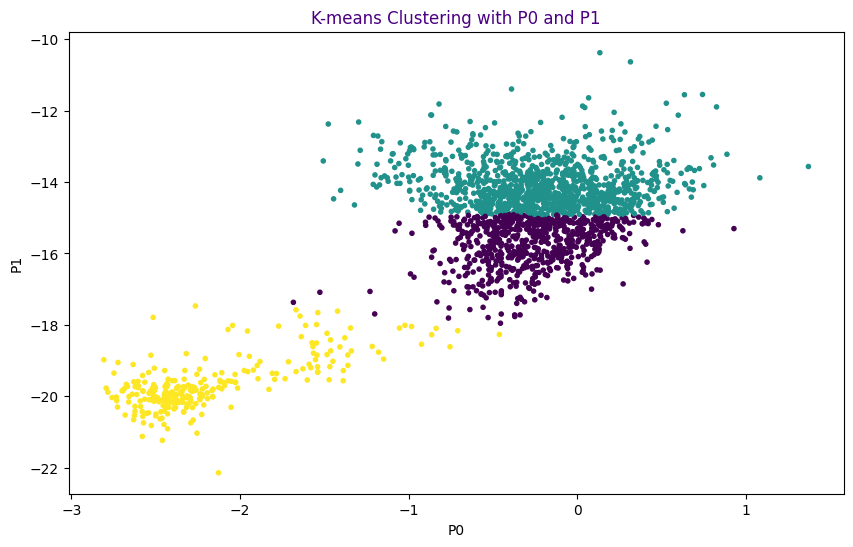

In [18]:
# Apply K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
# Fit the model and predict cluster
filtered_data['Cluster'] = kmeans.fit_predict(X)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(
    filtered_data['log_P0'],
    filtered_data['log_P1'],
    c=filtered_data['Cluster'],
    cmap='viridis',  #
    marker='.'
)
plt.xlabel('P0')
plt.ylabel('P1')
plt.title('K-means Clustering with P0 and P1', color='indigo')  # Plot title
plt.show()  # Display the plot


In [19]:
#creating paramgrids for optimizing K-Means
param_grid = {
    'init': ['k-means++', 'random'],
    'n_init': [10, 20, 30],
    'max_iter': [300, 400, 500],
    'tol': [1e-4, 1e-3, 1e-2]
}

# defining silhouette scorer function to get custom silhouette score
def silhouette_scorer(estimator, X):
  return silhouette_score(X, estimator.fit_predict(X))

#initializing  GridsearchCV
grid_searchCV = GridSearchCV(
    KMeans(random_state = 42),
    param_grid,
    scoring=silhouette_scorer
)

#fit GridSearchCV
grid_searchCV.fit(X)

#find best parameter with grid search
best_parameters = grid_searchCV.best_params_
print("The best parameters found:",best_parameters)

The best parameters found: {'init': 'random', 'max_iter': 300, 'n_init': 30, 'tol': 0.0001}


In [21]:
#apply KMeans with best parameters
kmeans= KMeans(
    n_clusters=3,
    init=best_parameters['init'],
    n_init=best_parameters['n_init'],
    max_iter=best_parameters['max_iter'],
    tol=best_parameters['tol'],
    random_state=42
)

# Fit the model and predict cluster assignments
filtered_data['Cluster'] = kmeans.fit_predict(X)

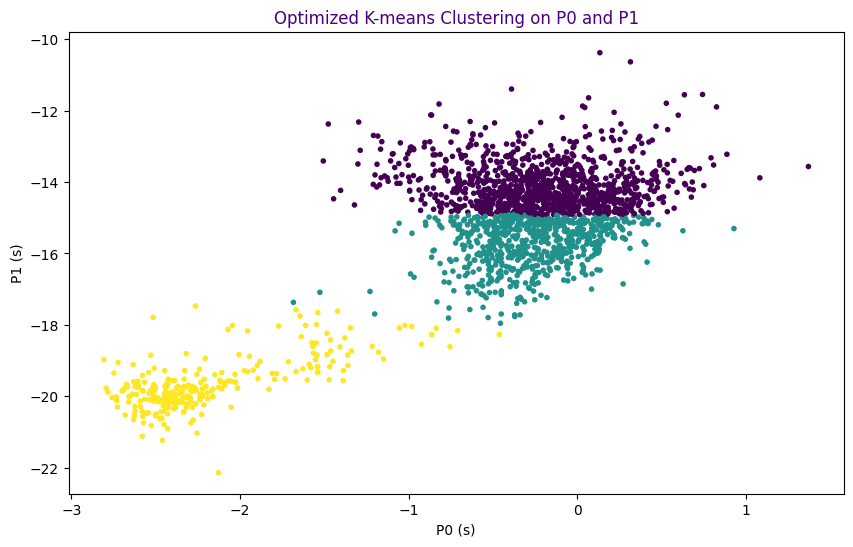

In [22]:
# Plot the optimized K Means clusters
plt.figure(figsize=(10, 6))

plt.scatter(
    filtered_data['log_P0'],
    filtered_data['log_P1'],
    c=filtered_data['Cluster'],
    cmap='viridis',
    marker='.'
)

plt.title('Optimized K-means Clustering on P0 and P1',color ='indigo')
plt.xlabel('P0 (s)')
plt.ylabel('P1 (s)')
plt.show()

### **K MEANS CLUSTERING WITH 4 FEATURES**

In [23]:
X_1=filtered_data[['log_P0','log_P1','S1400','DM']]

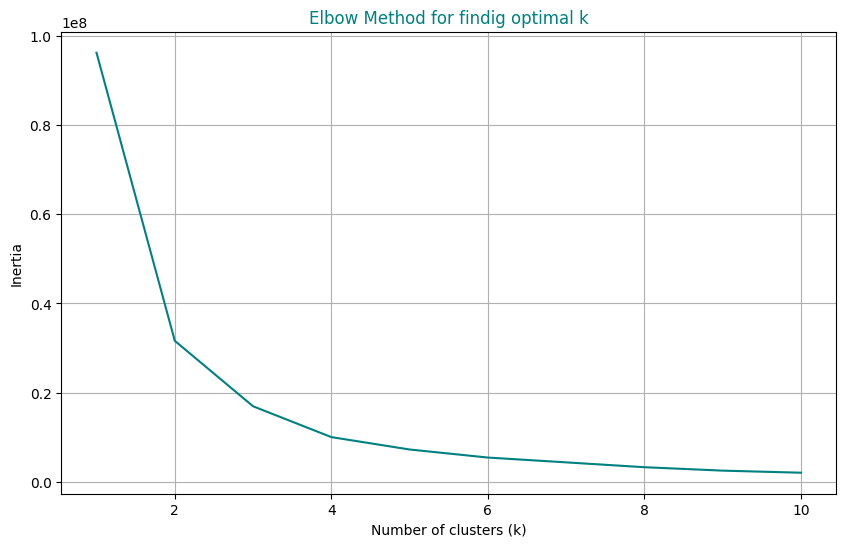

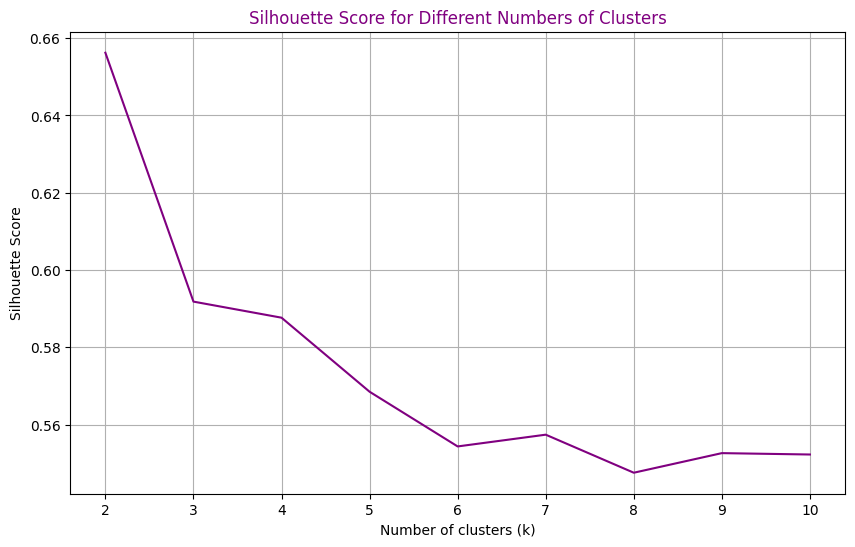

In [24]:
#looking for optimal K values by using the Elbow method and Silhouette scores

K = range(1, 11)
inertia = []
silhouette_scores = []

#Elbow method
for k in K:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X_1)
  inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, color='teal')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for findig optimal k', color='teal')
plt.grid(True)
plt.show()


#silhouette score
for k in K[1:]:
  kmeans = KMeans(n_clusters=k)
  labels = kmeans.fit_predict(X_1)
  silhouette_scores.append(silhouette_score(X_1,labels))


# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(K[1:], silhouette_scores, label='Silhouette Score', color='purple')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters', color='purple')
plt.grid(True)

plt.show()

Selected optimal number of clusters From elbow method and silhouette score = 4

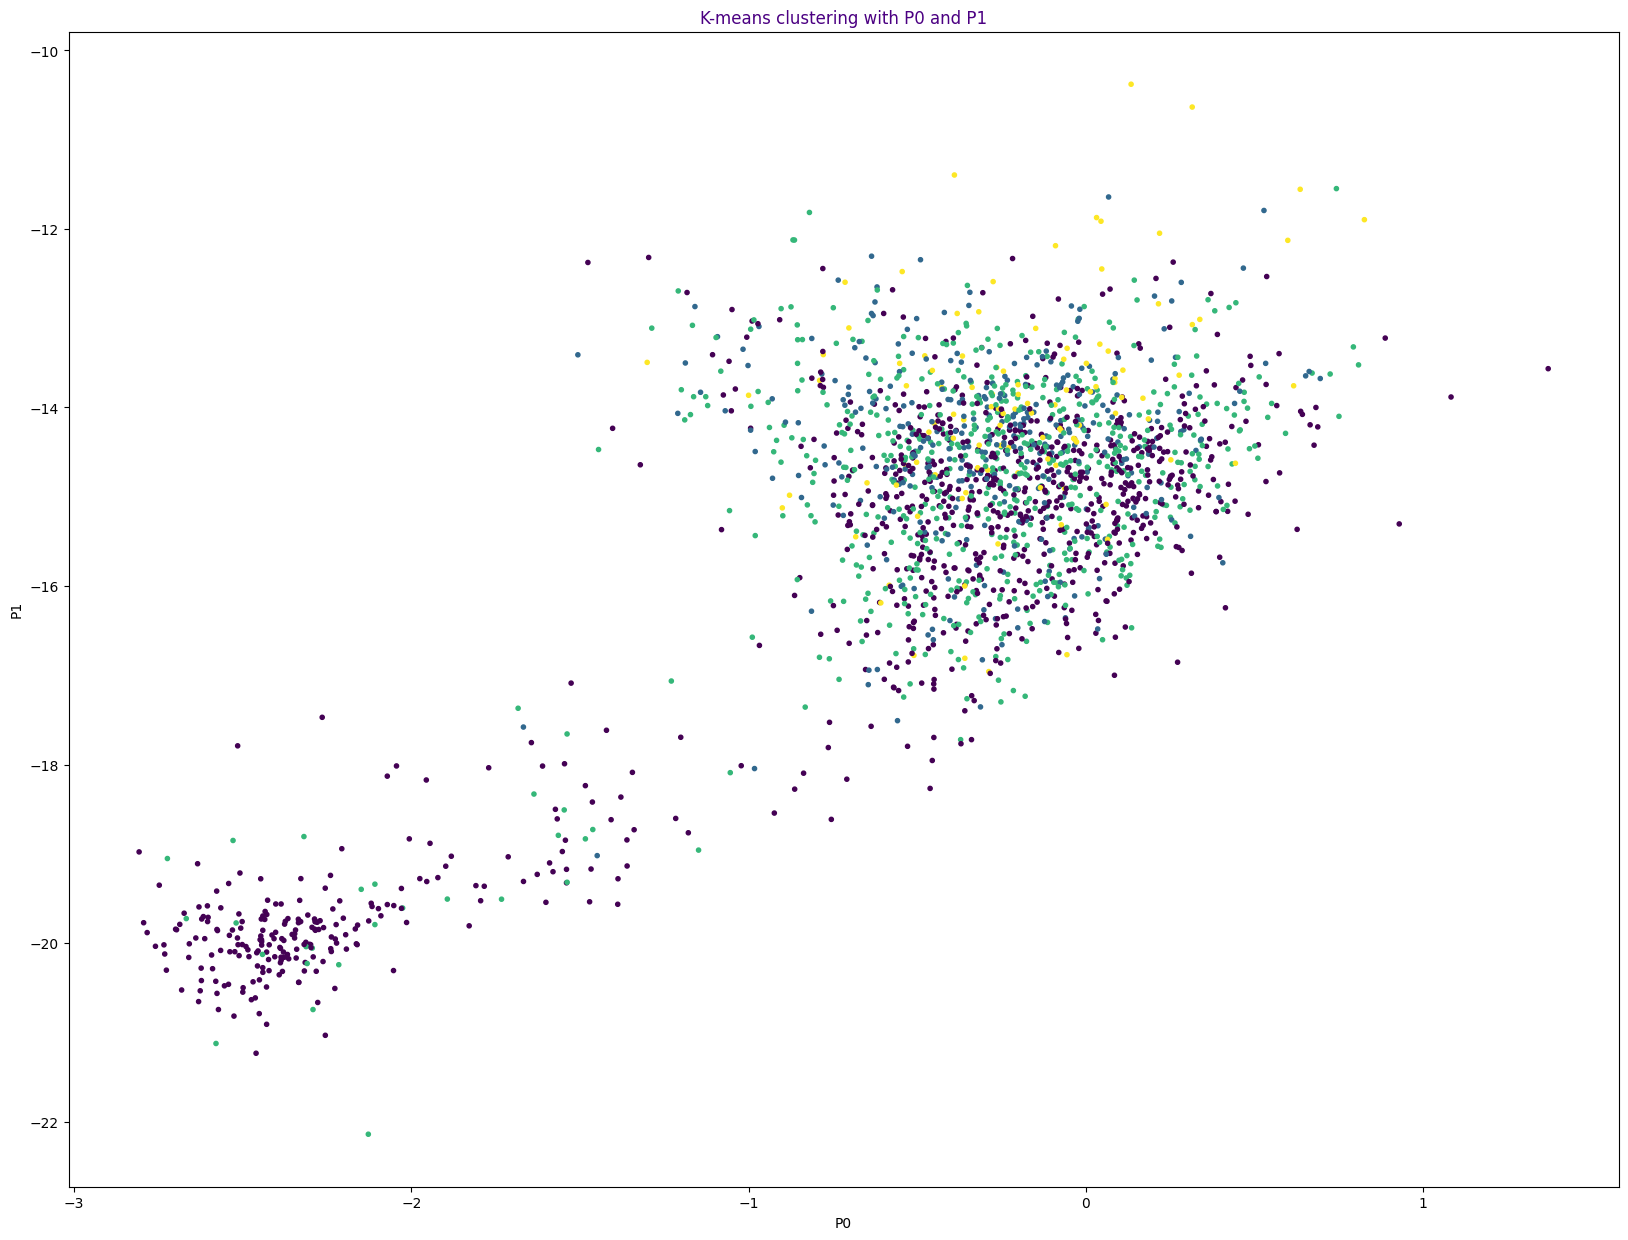

In [29]:
#applying K means with 4 clusters
kmeans = KMeans(n_clusters=4, random_state = 42)
k_fit = kmeans.fit_predict(X_1)

#plot the clusters
plt.figure(figsize=(20, 15))
plt.scatter(
    X_1['log_P0'],
    X_1['log_P1'],
    cmap='viridis',
    c=k_fit,
    marker='.'
)

plt.xlabel('P0')
plt.ylabel('P1')
plt.title('K-means clustering with P0 and P1',color='indigo')
plt.show()

In [30]:
#creating paramgrids for optimizing K-Means
param_grid = {
    'init': ['k-means++', 'random'],
    'n_init': [10, 20, 30],
    'max_iter': [300, 400, 500],
    'tol': [1e-4, 1e-3, 1e-2]
}

# defining silhouette scorer function to get custom silhouette score
def silhouette_scorer(estimator, X_1):
  return silhouette_score(X_1, estimator.fit_predict(X_1))


#initializing  GridsearchCV
grid_searchCV = GridSearchCV(
    KMeans(),
    param_grid,
    scoring=silhouette_scorer,
    cv=5
)

#fit GridSearchCV
grid_searchCV.fit(X_1)

#find best parameter with grid search
best_parameters = grid_searchCV.best_params_
print("The best parameters found:",best_parameters)



The best parameters found: {'init': 'k-means++', 'max_iter': 400, 'n_init': 30, 'tol': 0.001}


In [31]:
#apply KMeans with best parameters
kmeans= KMeans(
    n_clusters=4,
    init=best_parameters['init'],
    n_init=best_parameters['n_init'],
    max_iter=best_parameters['max_iter'],
    tol=best_parameters['tol'],
    random_state=42
)

best_k = kmeans.fit_predict(X_1)

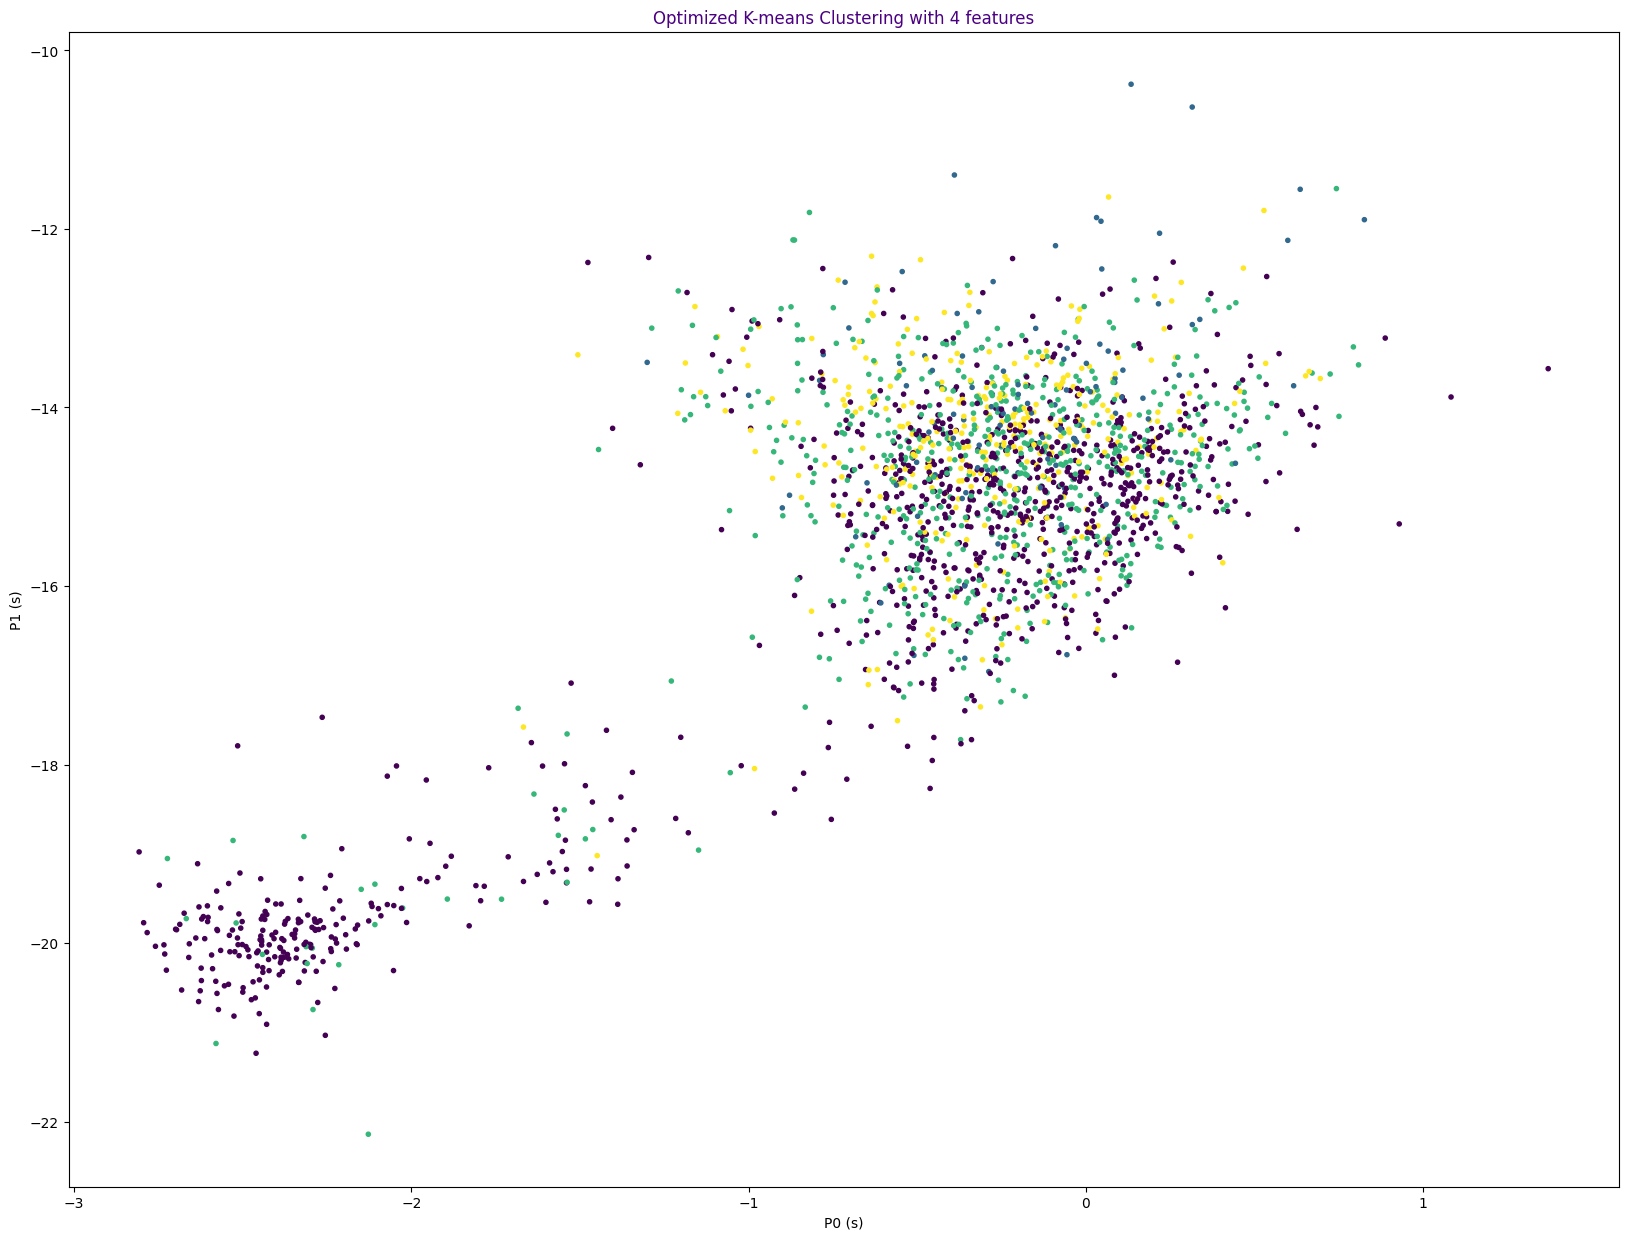

In [32]:
# Plot the optimized K Means clusters
plt.figure(figsize=(20, 15))
plt.scatter(
    X_1['log_P0'],
    X_1['log_P1'],
    c=best_k,
    cmap='viridis',
    marker='.'
)

plt.title('Optimized K-means Clustering with 4 features',color ='indigo')
plt.xlabel('P0 (s)')
plt.ylabel('P1 (s)')
plt.show()

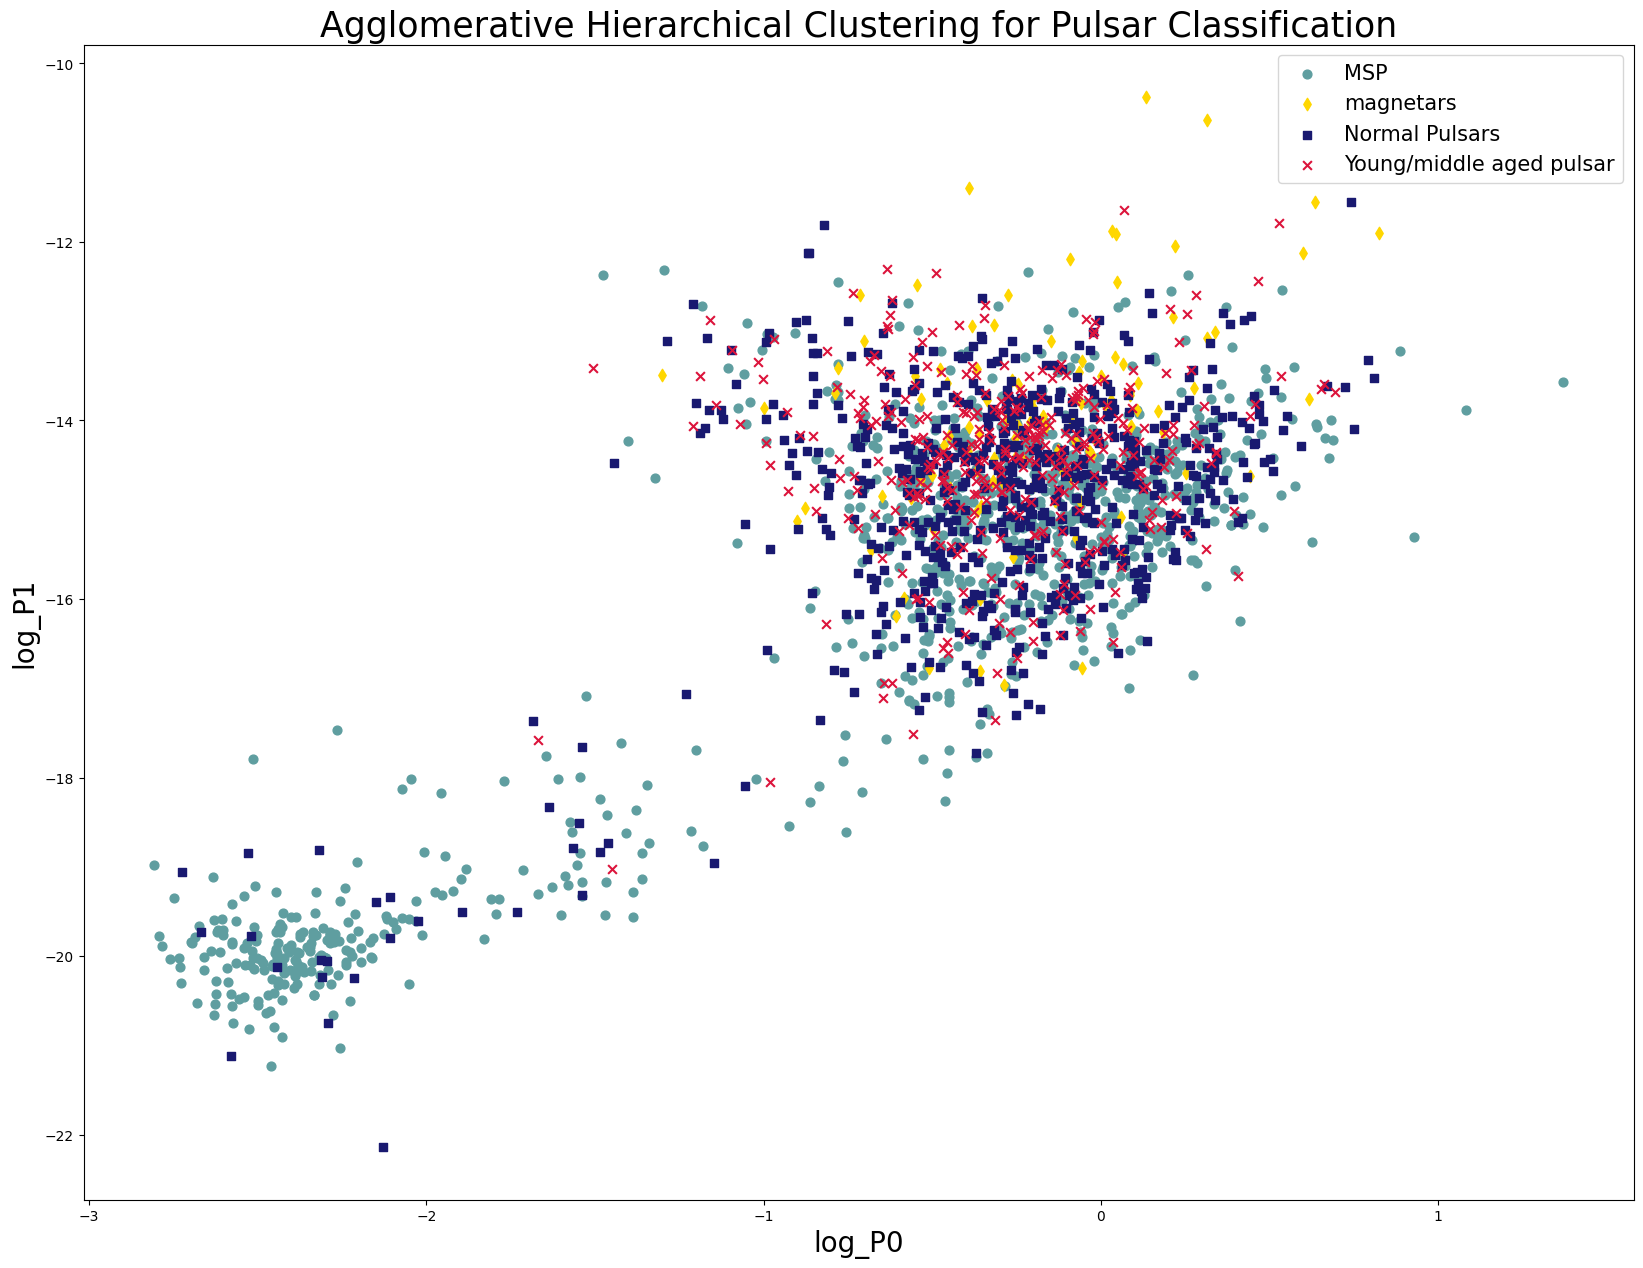

Silhouette Score: 0.5877


In [34]:
cluster_styles = [
    {'color': 'cadetblue', 'marker': 'o'},
    {'color': 'gold', 'marker': 'd'},
    {'color': 'midnightblue', 'marker': 's'},
    {'color': 'crimson', 'marker': 'x'}
]

cluster_names = ['MSP', 'magnetars', 'Normal Pulsars', 'Young/middle aged pulsar']

# Plot the clusters
plt.figure(figsize=(20, 15))

for cluster_label in np.unique(best_k):
    cluster_data = filtered_data[best_k == cluster_label]
    style = cluster_styles[cluster_label]
    plt.scatter(cluster_data['log_P0'], cluster_data['log_P1'],
                color=style['color'],
                marker=style['marker'],
                s=40, label=cluster_names[cluster_label])

# Set plot title and labels
plt.title('Agglomerative Hierarchical Clustering for Pulsar Classification',fontsize=25)
plt.xlabel('log_P0',fontsize=20)
plt.ylabel('log_P1',fontsize=20)
plt.legend(fontsize=15)

# Show plot
plt.show()

# Calculate and print the silhouette score
silhouette_avg = silhouette_score(X_1, best_k)
print(f'Silhouette Score: {silhouette_avg:.4f}')

# **HIERARCHIAL CLUSTERING WITH 2 FEATURES**

In [35]:
X = filtered_data[['log_P0','log_P1']]

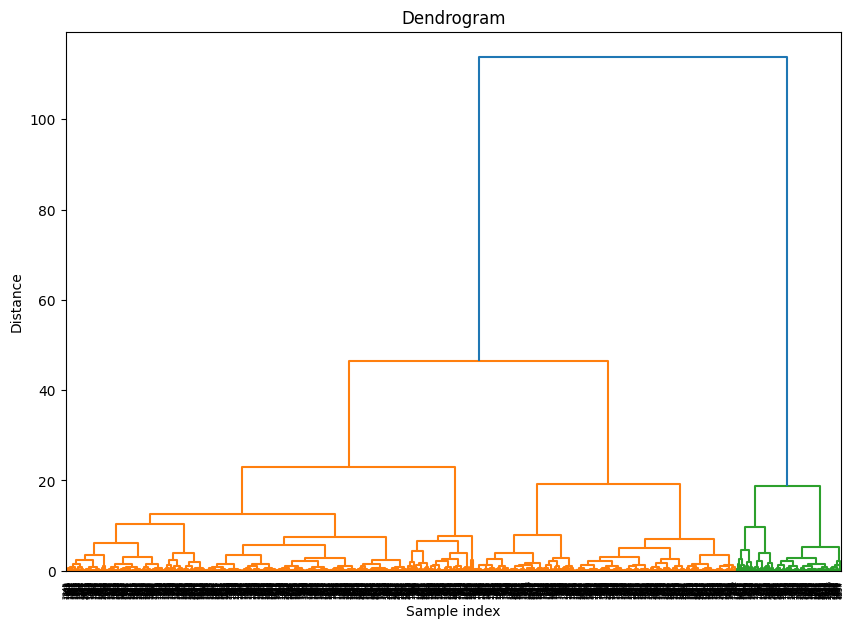

In [36]:
# Perform hierarchical clustering
linked = sch.linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
sch.dendrogram(
    linked,
    orientation='top',
    distance_sort='descending',
    show_leaf_counts=True
)

# Add title and labels to the plot
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')

# Display the plot
plt.show()


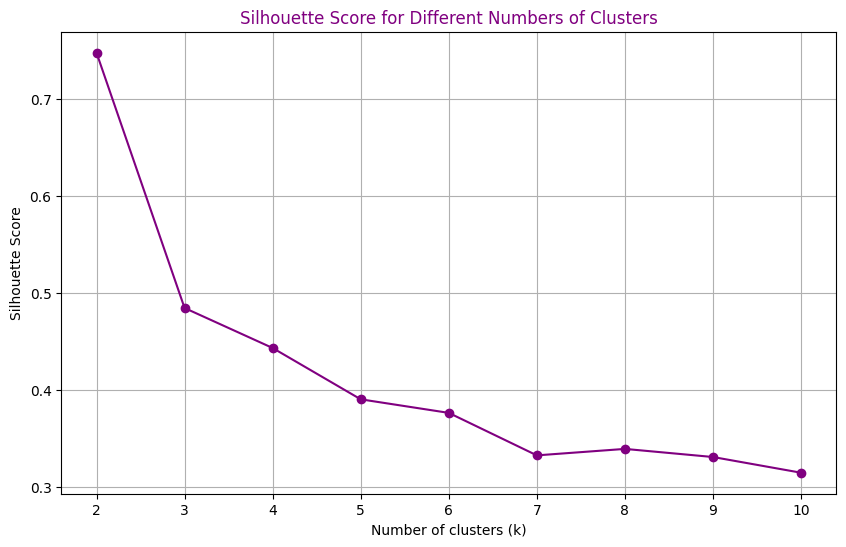

In [37]:
# finding silhouette score for agglomerative clustering
K = range(2, 11)
silhouette_scores = []

# Calculate silhouette scores
for k in K:
    agglomerative = AgglomerativeClustering(n_clusters=k)

    labels_a = agglomerative.fit_predict(X)

    silhouette_scores.append(silhouette_score(X, labels_a))

# Plot the resulting silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, marker='o', color='purple')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters', color='purple')
plt.grid(True)
plt.show()

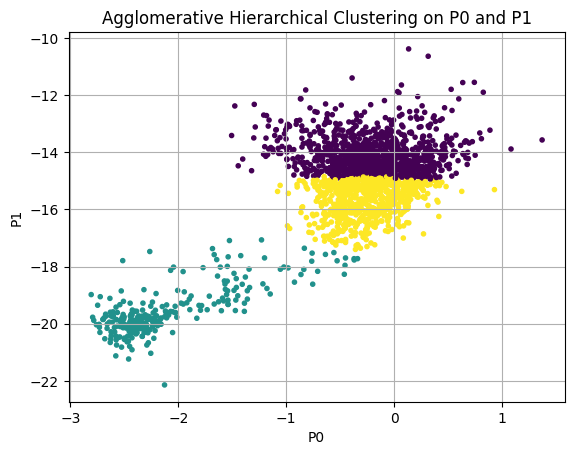

In [41]:
# Perform Agglomerative Hierarchical Clustering
hc = AgglomerativeClustering(
    n_clusters = 3,
    affinity = 'euclidean',
    linkage ='ward'
)

# Fit the model and predict the cluster labels
y_hc = hc.fit_predict(X)

# Adding the clusters to the DataFrame
filtered_data['Cluster'] = y_hc

#plot the clusters
plt.scatter(
    X_1['log_P0'],
    X_1['log_P1'],
    cmap='viridis',
    c=y_hc,
    marker='.'
)

plt.title('Agglomerative Hierarchical Clustering on P0 and P1')
plt.xlabel('P0')
plt.ylabel('P1')
plt.grid(True)
plt.show()

In [42]:
# Plot silhouette scores for each sample

silhouette_avg = silhouette_score(X, y_hc)
print(f'Average Silhouette Score: {silhouette_avg:.2f}')


Average Silhouette Score: 0.48


In [44]:
# Set up parameters for grid search
param_grid = {
    'linkage': ['ward', 'complete', 'average', 'single'],
    'affinity': ['euclidean',  'manhattan', 'cosine']
}

# Custom scorer for silhouette score
def silhouette_scorer(estimator, X):
    cluster_labels = estimator.fit_predict(X)
    return silhouette_score(X, cluster_labels)

# Perform grid search
grid_search = GridSearchCV(
    AgglomerativeClustering(),
    param_grid,
    scoring=silhouette_scorer
)


grid_search.fit(X)

GridSearchCV(estimator=AgglomerativeClustering(),
             param_grid={'affinity': ['euclidean', 'manhattan', 'cosine'],
                         'linkage': ['ward', 'complete', 'average', 'single']},
             scoring=<function silhouette_scorer at 0x7c26b05eacb0>)

In [45]:
# Get the best parameters and score
best_parameters = grid_search.best_params_

print(f"Best Parameters: {best_parameters}")

Best Parameters: {'affinity': 'manhattan', 'linkage': 'average'}


In [47]:
# Fit the model with the best parameters
best_model = AgglomerativeClustering(
    n_clusters=3,
    linkage=best_parameters['linkage'],
    affinity=best_parameters['affinity']
)

best_A = best_model.fit_predict(X)

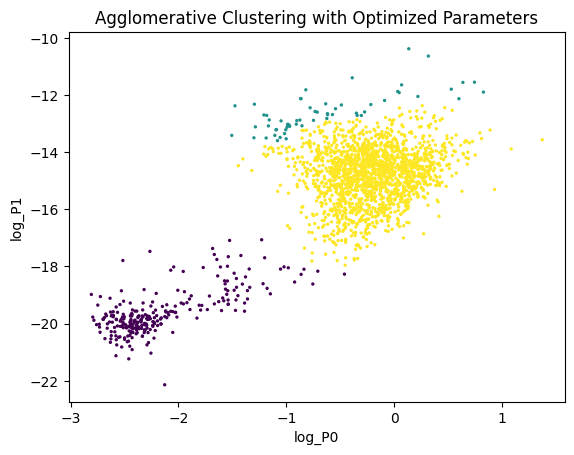

Silhouette Score: 0.483


In [48]:
# Visualize the resulting clusters
plt.scatter(X['log_P0'], X['log_P1'], c=best_A, cmap='viridis', s=2)
plt.xlabel('log_P0')
plt.ylabel('log_P1')
plt.title('Agglomerative Clustering with Optimized Parameters')
plt.show()

# Calculate and print silhouette score
silhouette_avg = silhouette_score(X, labels)
print(f'Silhouette Score: {silhouette_avg:.3f}')

# **HIERARCHICAL CLUSTERING WITH FOUR** **FEATURES**

In [49]:
X_1=filtered_data[['log_P0','log_P1','S1400','DM']]

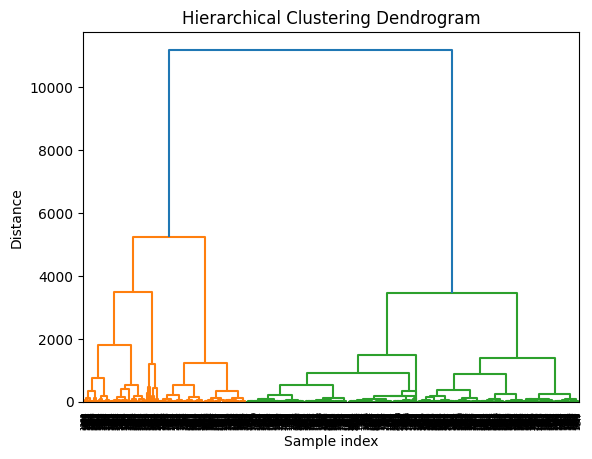

In [50]:
# Perform hierarchical clustering
linked = sch.linkage(X_1, method='ward')

sch.dendrogram(
    linked,
    orientation='top',
    distance_sort='descending',
    show_leaf_counts=True
)

plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

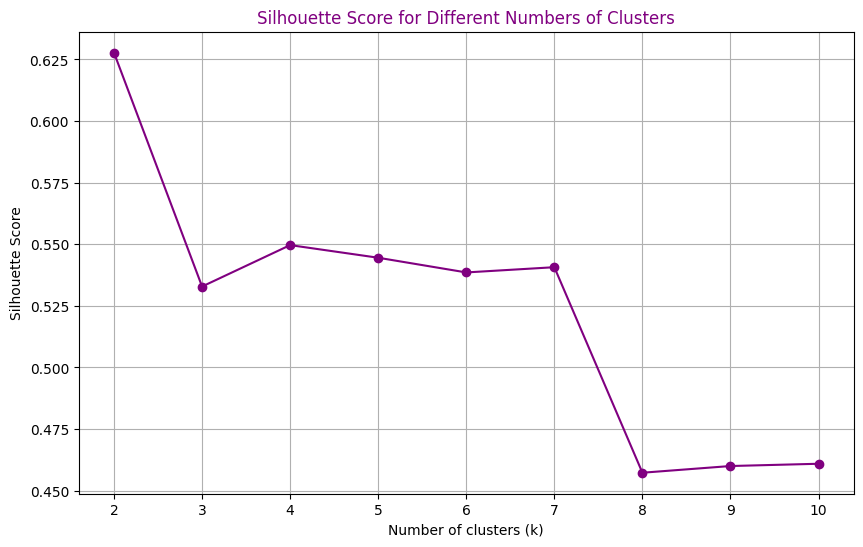

In [52]:
# finding silhouette score for agglomerative clustering
K = range(2, 11)
silhouette_scores = []

# Calculate silhouette scores
for k in K:
    agglomerative = AgglomerativeClustering(n_clusters=k)
    label = agglomerative.fit_predict(X_1)
    silhouette_scores.append(silhouette_score(X_1, label))

# Plot the resulting silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, marker='o', color='purple')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters', color='purple')
plt.grid(True)
plt.show()


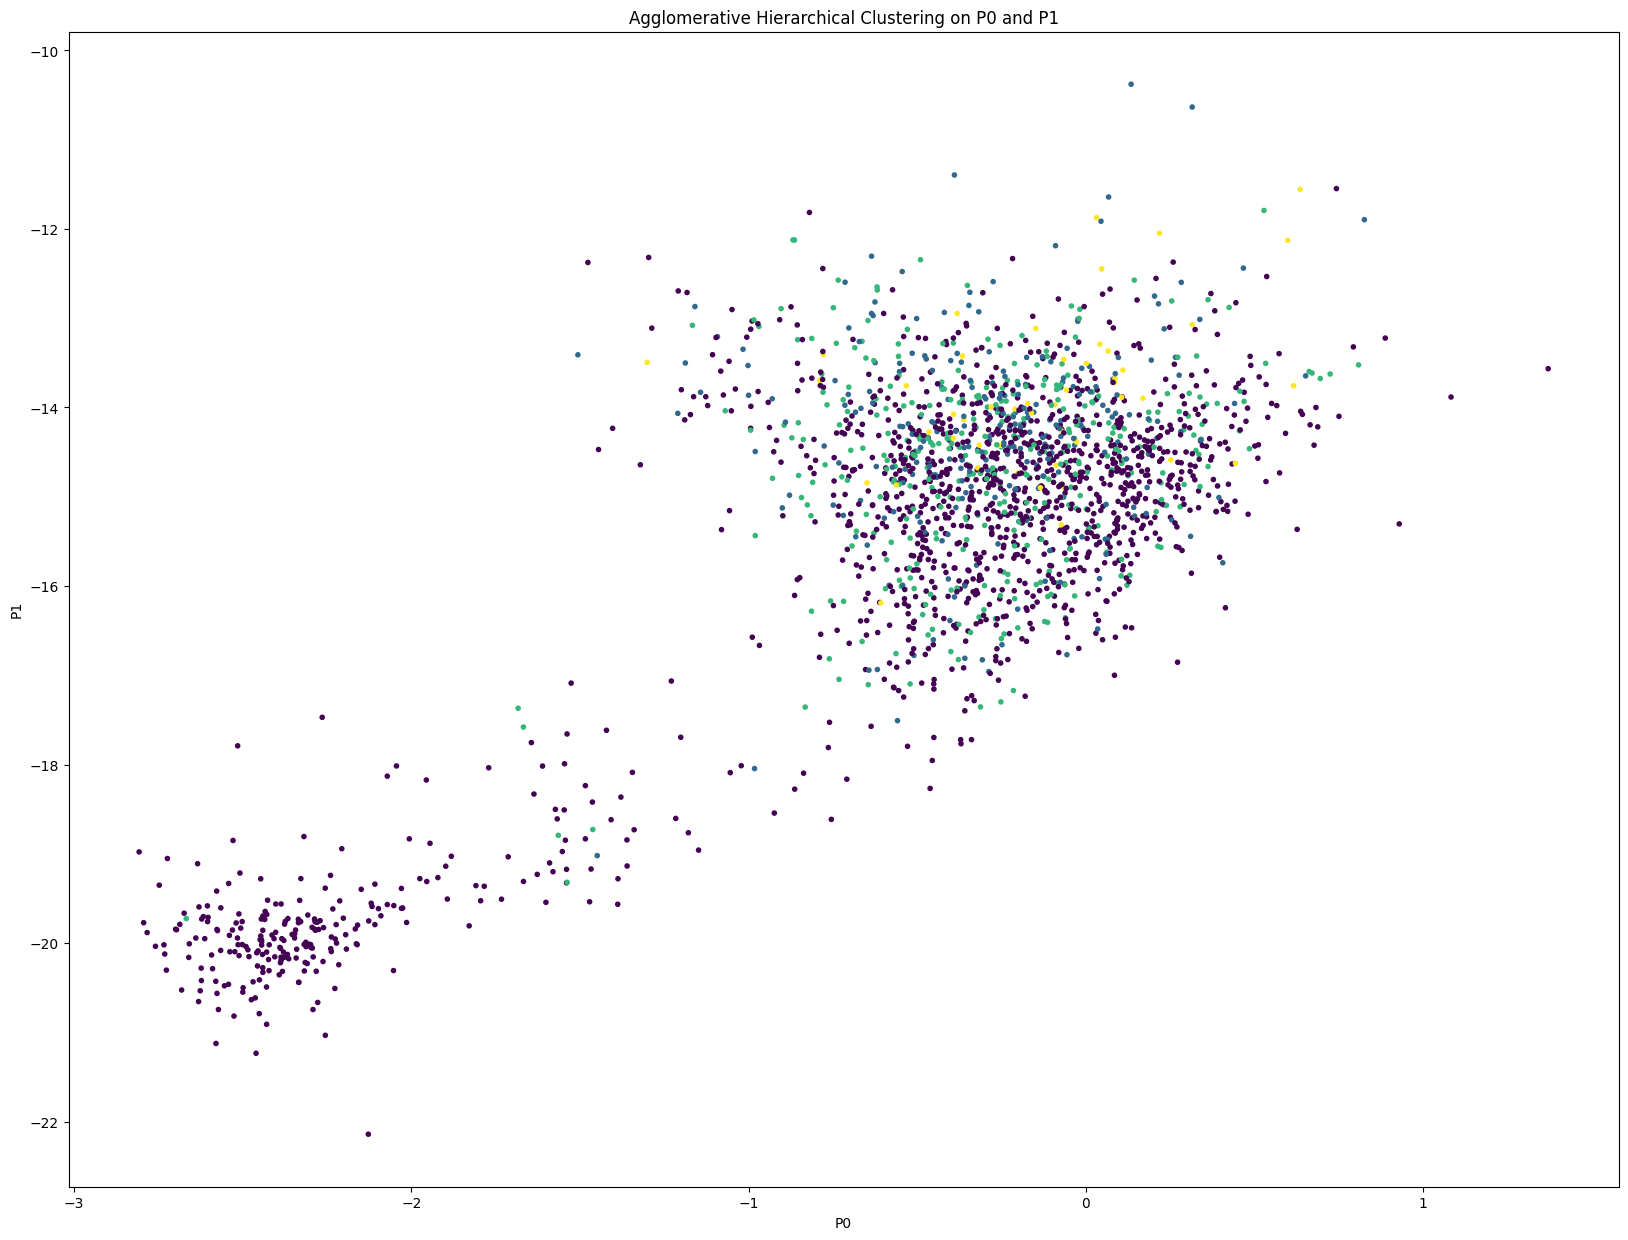

In [53]:
# Perform Agglomerative Hierarchical Clustering
hc = AgglomerativeClustering(
    n_clusters = 4,
    affinity = 'euclidean',
    linkage ='ward'
)

best_hc_4= hc.fit_predict(X_1)


#plot the clusters
plt.figure(figsize=(20,15))
plt.scatter(
    X_1['log_P0'],
    X_1['log_P1'],
    cmap='viridis',
    c=best_hc_4,
    marker='.'
  )

plt.title('Agglomerative Hierarchical Clustering on P0 and P1')
plt.xlabel('P0')
plt.ylabel('P1')
plt.show()

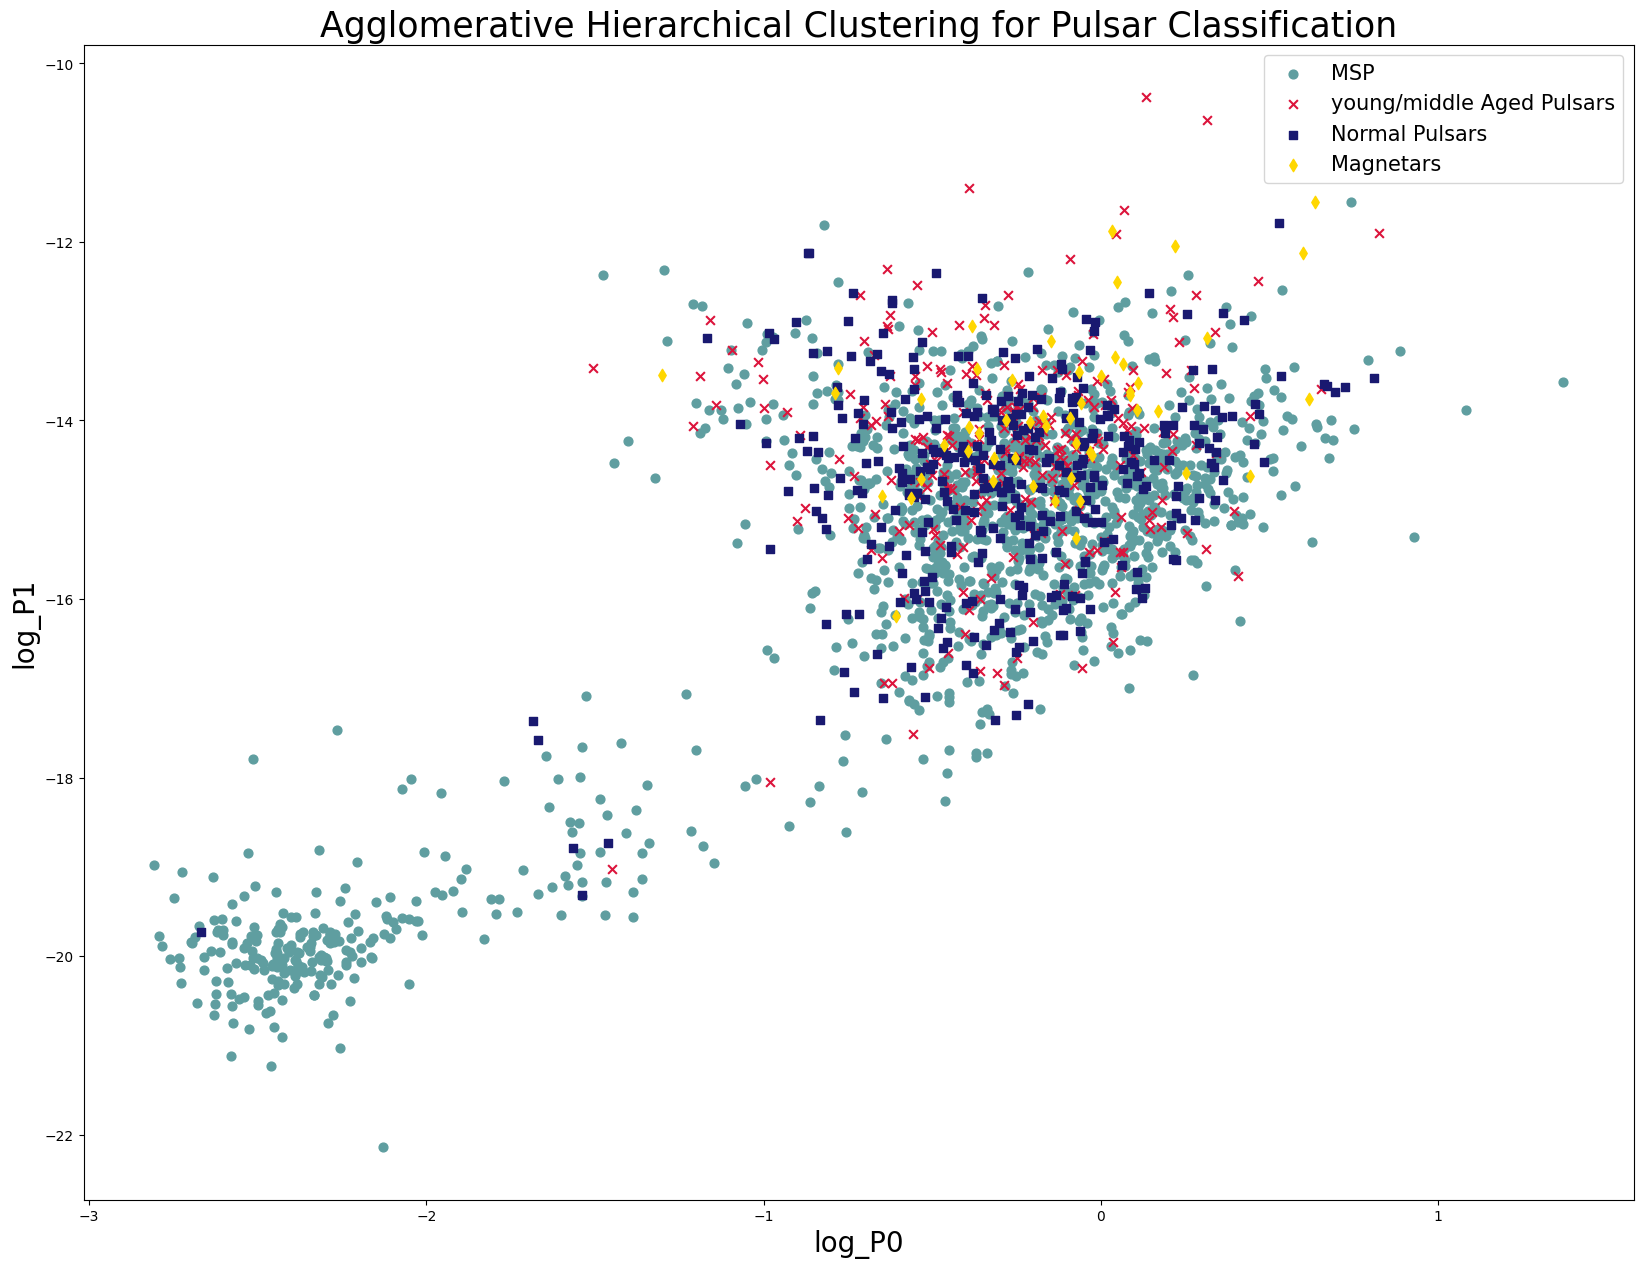

Silhouette Score: 0.5496


In [57]:
# Define cluster styles and names
cluster_styles = [
    {'color': 'cadetblue', 'marker': 'o'},
    {'color': 'crimson', 'marker': 'x'},
    {'color': 'midnightblue', 'marker': 's'},
    {'color': 'gold', 'marker': 'd'}
]

cluster_names = ['MSP', 'young/middle Aged Pulsars', 'Normal Pulsars', 'Magnetars']

# Plot the clusters
plt.figure(figsize=(20, 15))

for cluster_label in np.unique(best_hc_4):
    cluster_data = filtered_data[best_hc_4 == cluster_label]
    style = cluster_styles[cluster_label]
    plt.scatter(cluster_data['log_P0'], cluster_data['log_P1'],
                color=style['color'],
                marker=style['marker'],
                s=40, label=cluster_names[cluster_label])

# Set plot title and labels
plt.title('Agglomerative Hierarchical Clustering for Pulsar Classification',fontsize=25)
plt.xlabel('log_P0',fontsize=20)
plt.ylabel('log_P1',fontsize=20)
plt.legend(fontsize=15)

# Show plot
plt.show()

# Calculate and print the silhouette score
silhouette_avg = silhouette_score(X_1, best_hc_4)
print(f'Silhouette Score: {silhouette_avg:.4f}')


In [58]:
# Set up parameters for grid search
param_grid = {
    'linkage': ['ward', 'complete', 'average', 'single'],
    'affinity': ['euclidean', 'manhattan', 'cosine']
}


# Custom scorer for silhouette score
def silhouette_scorer(estimator, X_1):
    cluster_labels = estimator.fit_predict(X_1)
    return silhouette_score(X_1, cluster_labels)

# Perform grid search
grid_search = GridSearchCV(
    AgglomerativeClustering(n_clusters=4),
    param_grid,
    scoring=silhouette_scorer
)
grid_search.fit(X_1)

GridSearchCV(estimator=AgglomerativeClustering(n_clusters=4),
             param_grid={'affinity': ['euclidean', 'manhattan', 'cosine'],
                         'linkage': ['ward', 'complete', 'average', 'single']},
             scoring=<function silhouette_scorer at 0x7c26a7225750>)

In [59]:
# Get the best parameters and score
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Parameters: {best_parameters}")



Best Parameters: {'affinity': 'euclidean', 'linkage': 'average'}


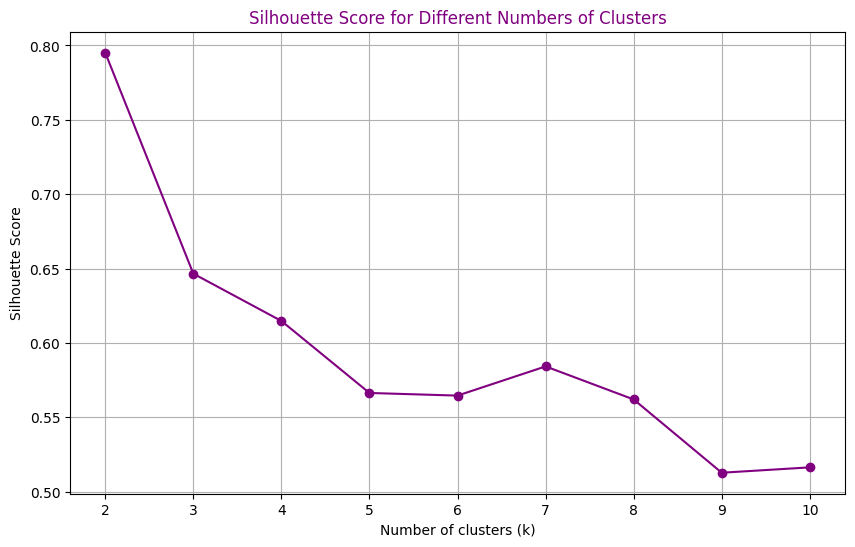

In [61]:
# finding silhouette score for agglomerative clustering
K = range(2, 11)
silhouette_scores = []

# Calculate silhouette scores
for k in K:
    agglomerative = AgglomerativeClustering(
        n_clusters=k,
        linkage=best_parameters['linkage'],
        affinity=best_parameters['affinity']
        )


    labels = agglomerative.fit_predict(X_1)
    silhouette_scores.append(silhouette_score(X_1, labels))

# Plot the resulting silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, marker='o', color='purple')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters', color='purple')
plt.grid(True)
plt.show()


In [62]:
# Fit the model with the best parameters
best_model = AgglomerativeClustering(n_clusters=4,
                                     linkage=best_parameters['linkage'],
                                     affinity=best_parameters['affinity'])
labels_hc = best_model.fit_predict(X_1)

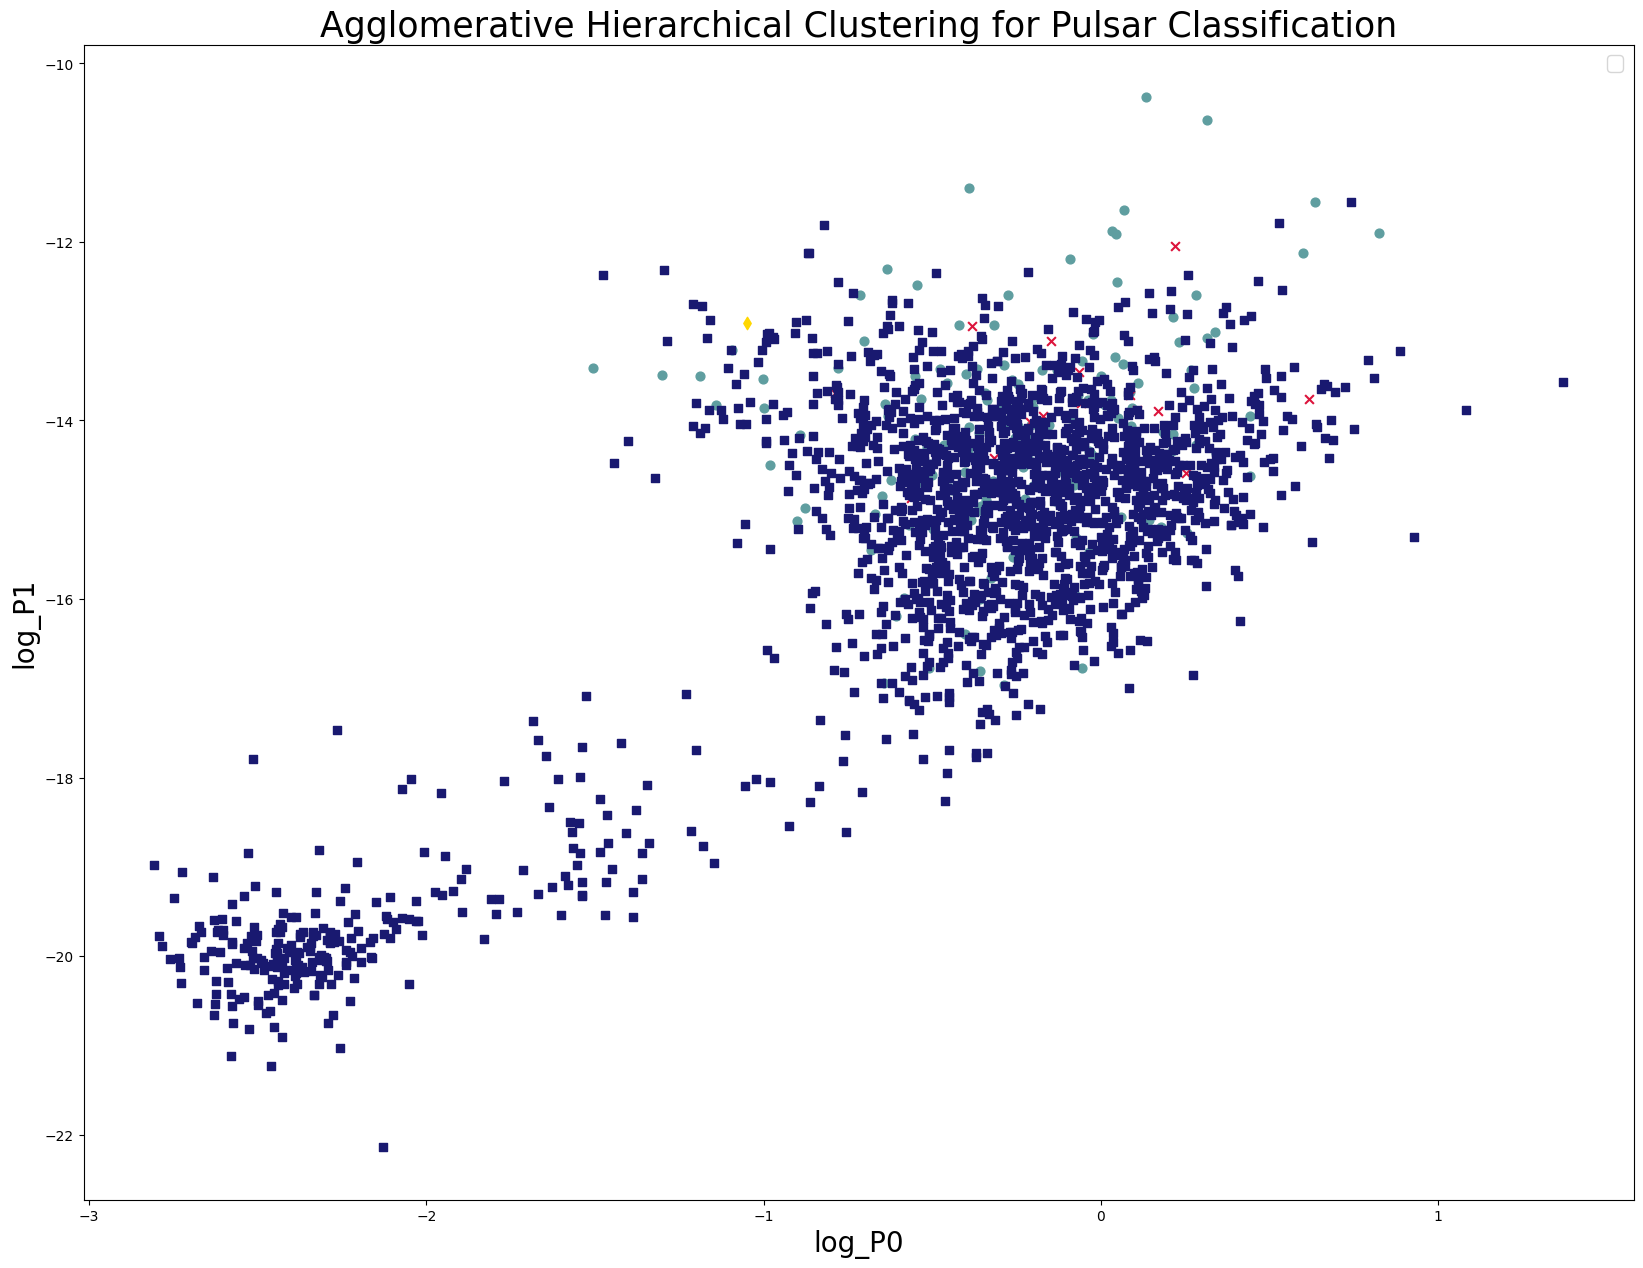

Silhouette Score: 0.6147


In [65]:
cluster_styles = [
    {'color': 'cadetblue', 'marker': 'o'},
    {'color': 'crimson', 'marker': 'x'},
    {'color': 'midnightblue', 'marker': 's'},
    {'color': 'gold', 'marker': 'd'}
]


# Plot the clusters
plt.figure(figsize=(20, 15))

for cluster_label in np.unique(labels_hc):
    cluster_data = filtered_data[labels_hc == cluster_label]
    style = cluster_styles[cluster_label]

    plt.scatter(cluster_data['log_P0'], cluster_data['log_P1'],
                color=style['color'],
                marker=style['marker'],
                s=40)


# Set plot title and labels
plt.title('Agglomerative Hierarchical Clustering for Pulsar Classification',fontsize=25)
plt.xlabel('log_P0',fontsize=20)
plt.ylabel('log_P1',fontsize=20)
plt.legend(fontsize=15)

# Show plot
plt.show()

# Calculate and print the silhouette score
silhouette_avg = silhouette_score(X_1, labels_hc)
print(f'Silhouette Score: {silhouette_avg:.4f}')

# **GAUSSIAN MIXTURE MODEL WITH TWO FEATURES**

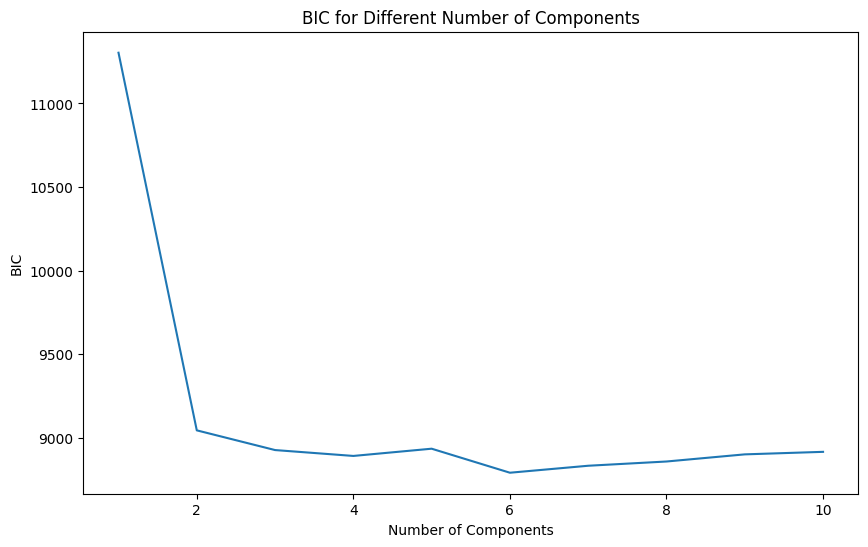

In [67]:
# # Define the range of components
n_components_range = range(1, 11)
bic_scores = []

# calculate the BIC score
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, covariance_type='full')
    gmm.fit(X)
    bic_scores.append(gmm.bic(X))

# Plot the result
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, bic_scores)
plt.title('BIC for Different Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('BIC')
plt.show()

In [68]:
X = filtered_data[['log_P0', 'log_P1']].values

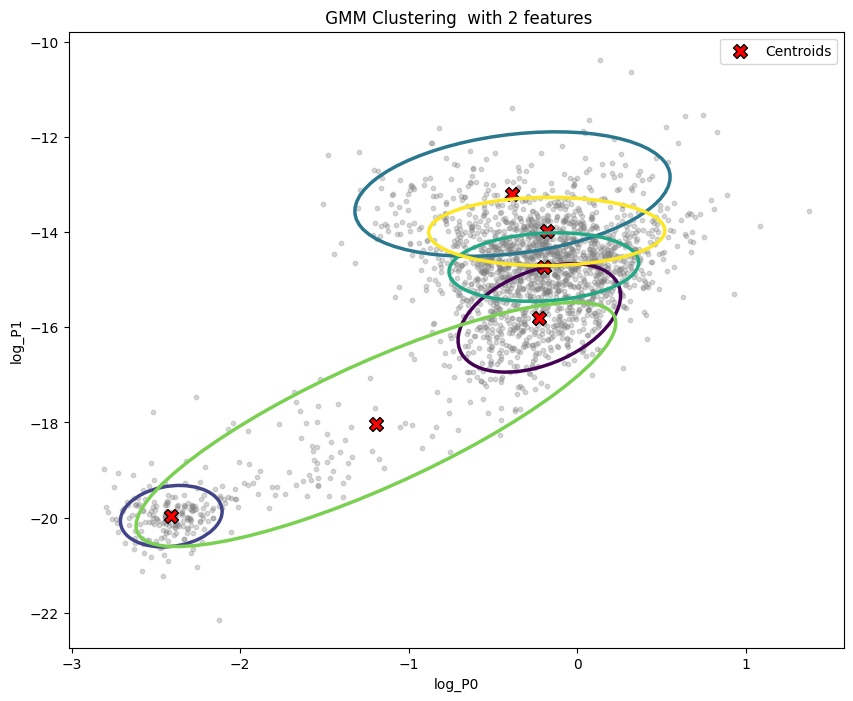

In [72]:
# plot the ellipse
def plot_gmm_ellipses(gmm, ax, colors):
    for i, (mean, covar) in enumerate(zip(gmm.means_, gmm.covariances_)):
        v, w = np.linalg.eigh(covar)
        v = 2.5 * np.sqrt(2.0) * np.sqrt(v)  # 2 standard deviations
        u = w[0] / np.linalg.norm(w[0])

        angle = np.arctan2(u[1], u[0])
        angle = 180.0 * angle / np.pi


        ell = Ellipse(mean, v[0], v[1], 180.0 + angle, edgecolor=colors[i], facecolor='none', linewidth=2.5)
        ax.add_patch(ell)

n_components = 6
gmm = GaussianMixture(n_components=n_components, covariance_type='full')
gmm.fit(X)

labels_gmm = gmm.predict(X)


# Define a color map for clusters
colors = plt.cm.viridis(np.linspace(0, 1, n_components))


plt.figure(figsize=(10, 8))
for i in range(n_components):
    plt.scatter(X[labels_gmm == i, 0], X[labels_gmm == i, 1],
                color='gray', s=10,alpha=0.3)

# Plot centroids
centroids = gmm.means_
plt.scatter(centroids[:, 0], centroids[:, 1],
            c='red', s=100, marker='X', edgecolors='k', label='Centroids')

# Plot ellipses
ax = plt.gca()
plot_gmm_ellipses(gmm, ax, colors)

plt.title(f' GMM Clustering  with 2 features' )
plt.xlabel('log_P0')
plt.ylabel('log_P1')
plt.legend()
plt.show()


In [73]:
# Define the types of covariance matrices and initialization methods
covariance_types = ['full', 'tied', 'diag', 'spherical']
init_methods = ['kmeans', 'random']
n_components = 6

# Initialize lists to store results
log_likelihoods = []
gmm_models = []
params = []

# Iterate over each combination of covariance type and initialization method
for cov_type in covariance_types:
    for init_method in init_methods:

        gmm = GaussianMixture(n_components=n_components,
                              covariance_type=cov_type,
                              init_params=init_method,
                              max_iter=500)
        gmm.fit(X)

        # Compute the log-likelihood of the model
        log_likelihood = gmm.score(X).sum()


        log_likelihoods.append(log_likelihood)
        gmm_models.append(gmm)
        params.append({'covariance_type': cov_type, 'init_params': init_method})


best_index = np.argmax(log_likelihoods)


best_gmm = gmm_models[best_index]
best_log_likelihood = log_likelihoods[best_index]
best_params = params[best_index]

print(f"Best Log-Likelihood: {best_log_likelihood}")
print(f"Best Parameters: {best_params}")


Best Log-Likelihood: -2.0704837829331257
Best Parameters: {'covariance_type': 'full', 'init_params': 'kmeans'}


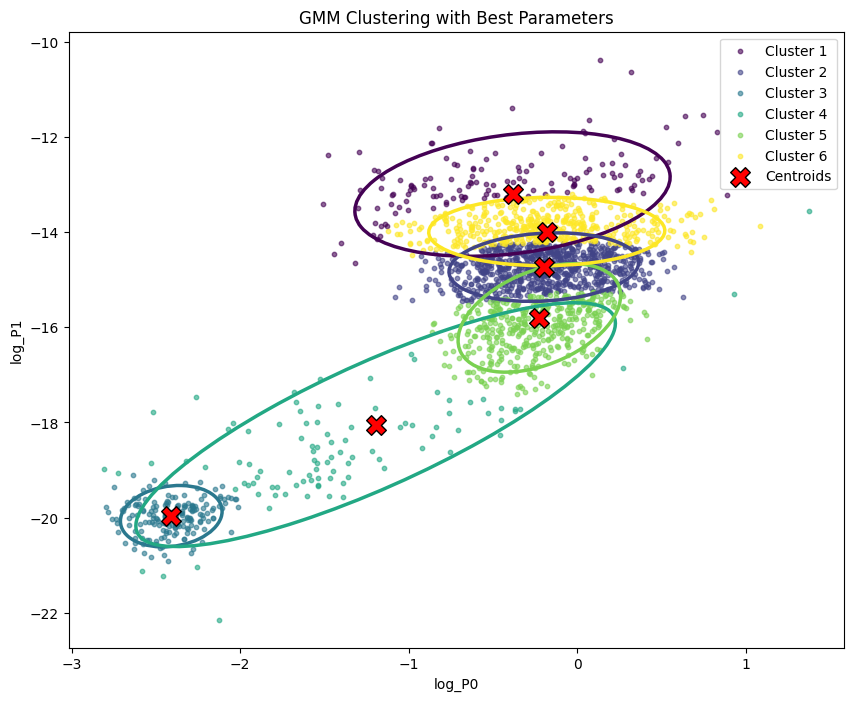

In [75]:
def plot_gmm_ellipses(gmm, ax, colors):
    for i, (mean, covar) in enumerate(zip(gmm.means_, gmm.covariances_)):
        v, w = np.linalg.eigh(covar)
        v = 2.5 * np.sqrt(2.0) * np.sqrt(v)
        u = w[0] / np.linalg.norm(w[0])


        angle = np.arctan2(u[1], u[0])
        angle = 180.0 * angle / np.pi


        ell = Ellipse(mean, v[0], v[1], 180.0 + angle, edgecolor=colors[i],
                      facecolor='none', linewidth=2.5)
        ax.add_patch(ell)


gmm = GaussianMixture(n_components=6,
                      covariance_type=best_params['covariance_type'],
                      init_params=best_params['init_params'],
                      max_iter=500)
gmm.fit(X)

# Predict cluster labels
labels_gmm = gmm.predict(X)

colors = plt.cm.viridis(np.linspace(0, 1, n_components))


plt.figure(figsize=(10, 8))


for i in range(n_components):
    plt.scatter(X[labels_gmm == i, 0], X[labels_gmm == i, 1],
                color=colors[i], s=10, alpha=0.6, label=f'Cluster {i+1}')


centroids = gmm.means_
plt.scatter(centroids[:, 0], centroids[:, 1],
            c='red', s=200, marker='X',
            edgecolors='k', label='Centroids', zorder=5)


ax = plt.gca()
plot_gmm_ellipses(gmm, ax, colors)


plt.title(f'GMM Clustering with Best Parameters')
plt.xlabel('log_P0')
plt.ylabel('log_P1')
plt.legend()
plt.show()


# **GAUSSIAN MIXTURE MODEL WITH FOUR FEATURES**

In [76]:
X_1 = filtered_data[['log_P0', 'log_P1', 'DM', 'S1400']]

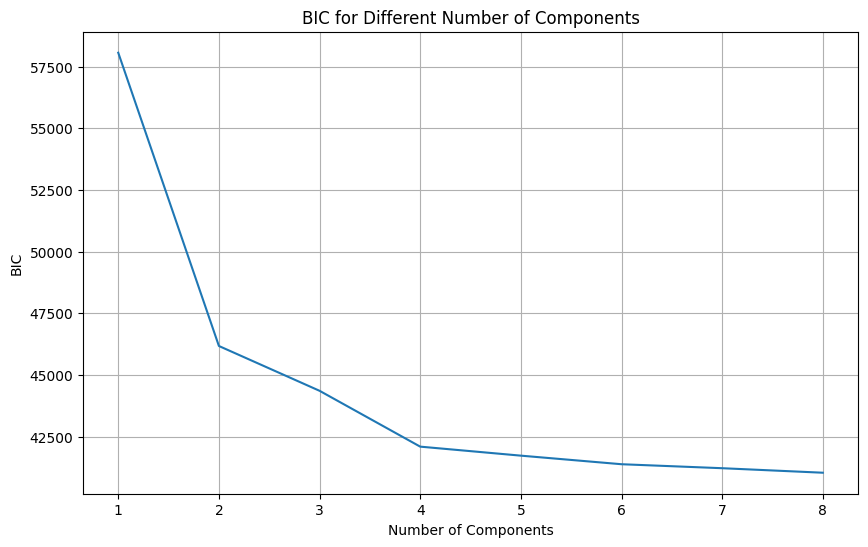

In [81]:
# define n-components range
n_components_range = range(1, 9)
bic_scores = []

# Fit GMM and calculate BIC for each number of components
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components,
                          covariance_type='full',random_state = 42)
    gmm.fit(X_1)
    bic_scores.append(gmm.bic(X_1))

# Plot BIC scores
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, bic_scores)
plt.title('BIC for Different Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('BIC')
plt.grid(True)
plt.show()

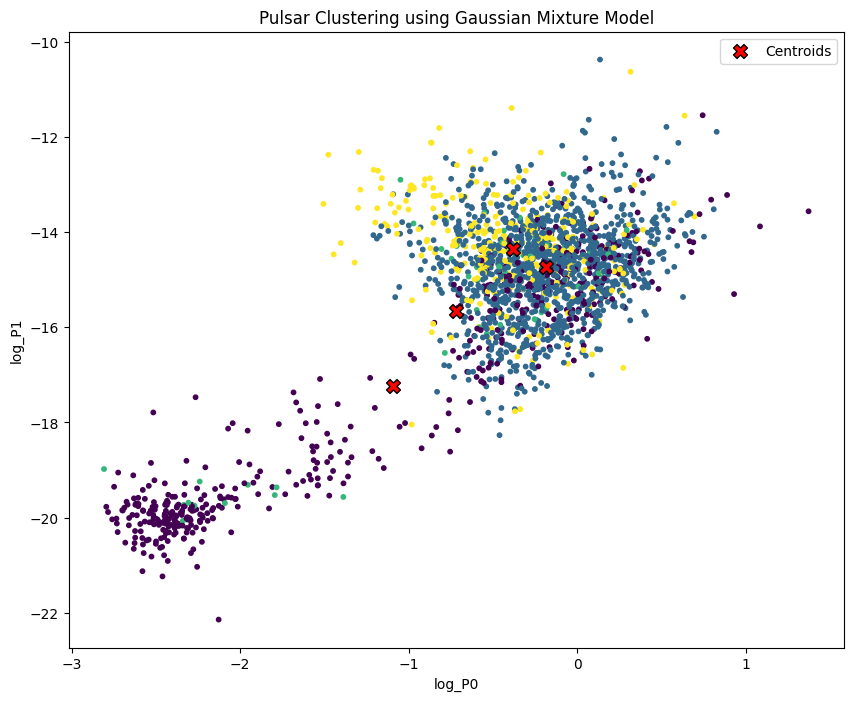

In [82]:
# Define the number of components
n_components = 4

# Initialize and fit the Gaussian Mixture Mode
gmm = GaussianMixture(n_components=n_components, covariance_type='full')
gmm.fit(X_1)

labels_gmm = gmm.predict(X_1)

# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(X_1['log_P0'], X_1['log_P1'], c=labels_gmm, cmap='viridis', s=10)

# Plot centroids
centroids = gmm.means_

plt.scatter(centroids[:, 0], centroids[:, 1],
            c='red', s=100, marker='X', edgecolors='k', label='Centroids')
plt.title('Pulsar Clustering using Gaussian Mixture Model')
plt.xlabel('log_P0')
plt.ylabel('log_P1')
plt.legend()
plt.show()


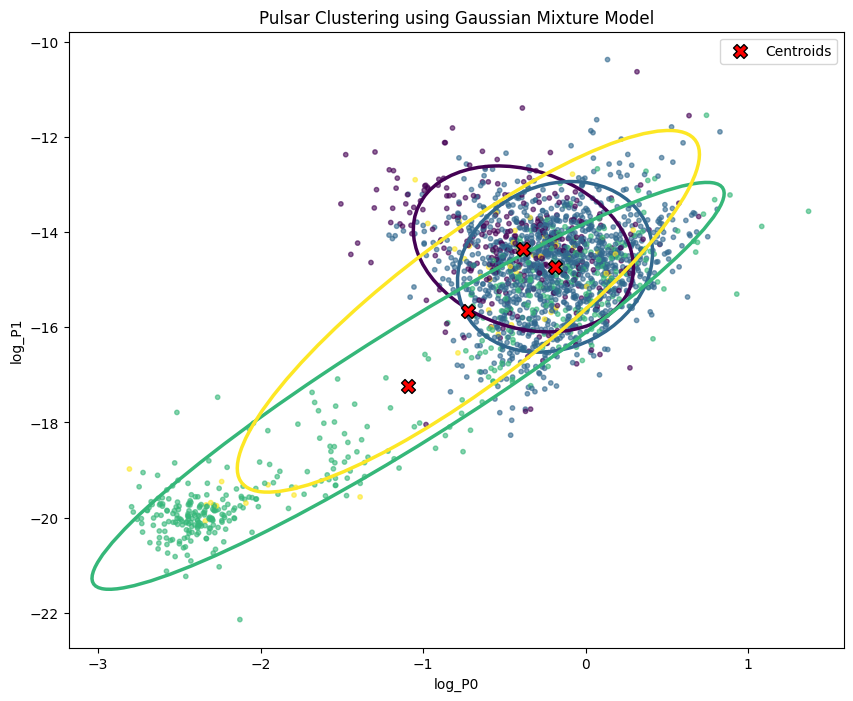

In [84]:
# plot ellipse
def plot_gmm_ellipses(gmm, ax, colors):
    for i, (mean, covar) in enumerate(zip(gmm.means_, gmm.covariances_)):
        v, w = np.linalg.eigh(covar[:2, :2])
        v = 2.5 * np.sqrt(2.0) * np.sqrt(v)
        u = w[0] / np.linalg.norm(w[0])


        angle = np.arctan2(u[1], u[0])
        angle = 180.0 * angle / np.pi


        ell = Ellipse(mean[:2], v[0], v[1], 180.0 + angle,
                      edgecolor=colors[i], facecolor='none', linewidth=2.5)
        ax.add_patch(ell)


# number of component
n_components = 4
gmm = GaussianMixture(n_components=n_components, covariance_type='full')
gmm.fit(X_1)


labels_gmm = gmm.predict(X_1)


colors = plt.cm.viridis(np.linspace(0, 1, n_components))

plt.figure(figsize=(10, 8))
plt.scatter(X_1['log_P0'], X_1['log_P1'], c=labels_gmm,
            cmap='viridis', s=10, alpha=0.6)

# Plot centroids
centroids = gmm.means_
plt.scatter(centroids[:, 0], centroids[:, 1],
            c='red', s=100, marker='X', edgecolors='k', label='Centroids', zorder=5)


ax = plt.gca()
plot_gmm_ellipses(gmm, ax, colors)

plt.title('Pulsar Clustering using Gaussian Mixture Model')
plt.xlabel('log_P0')
plt.ylabel('log_P1')
plt.legend()
plt.show()


In [86]:
# Define the types of covariance matrices and initialization methods
covariance_types = ['full', 'tied', 'diag', 'spherical']
init_methods = ['kmeans', 'random']
n_components = 4

log_likelihoods = []
gmm_models = []
params = []

# Iterate over each combination of covariance type and initialization method
for cov_type in covariance_types:
    for init_method in init_methods:

        gmm = GaussianMixture(n_components=n_components,
                              covariance_type=cov_type,
                              init_params=init_method,
                              max_iter=500,
                              random_state = 0)
        gmm.fit(X_1)

        # Compute the log-likelihood of the model
        log_likelihood = gmm.score(X_1)


        log_likelihoods.append(log_likelihood)
        gmm_models.append(gmm)
        params.append({'covariance_type': cov_type, 'init_params': init_method})


best_index = np.argmax(log_likelihoods)


best_gmm = gmm_models[best_index]
best_log_likelihood = log_likelihoods[best_index]
best_params = params[best_index]

print(f"Best Log-Likelihood: {best_log_likelihood}")
print(f"Best Parameters: {best_params}")


Best Log-Likelihood: -10.119060720788879
Best Parameters: {'covariance_type': 'full', 'init_params': 'kmeans'}


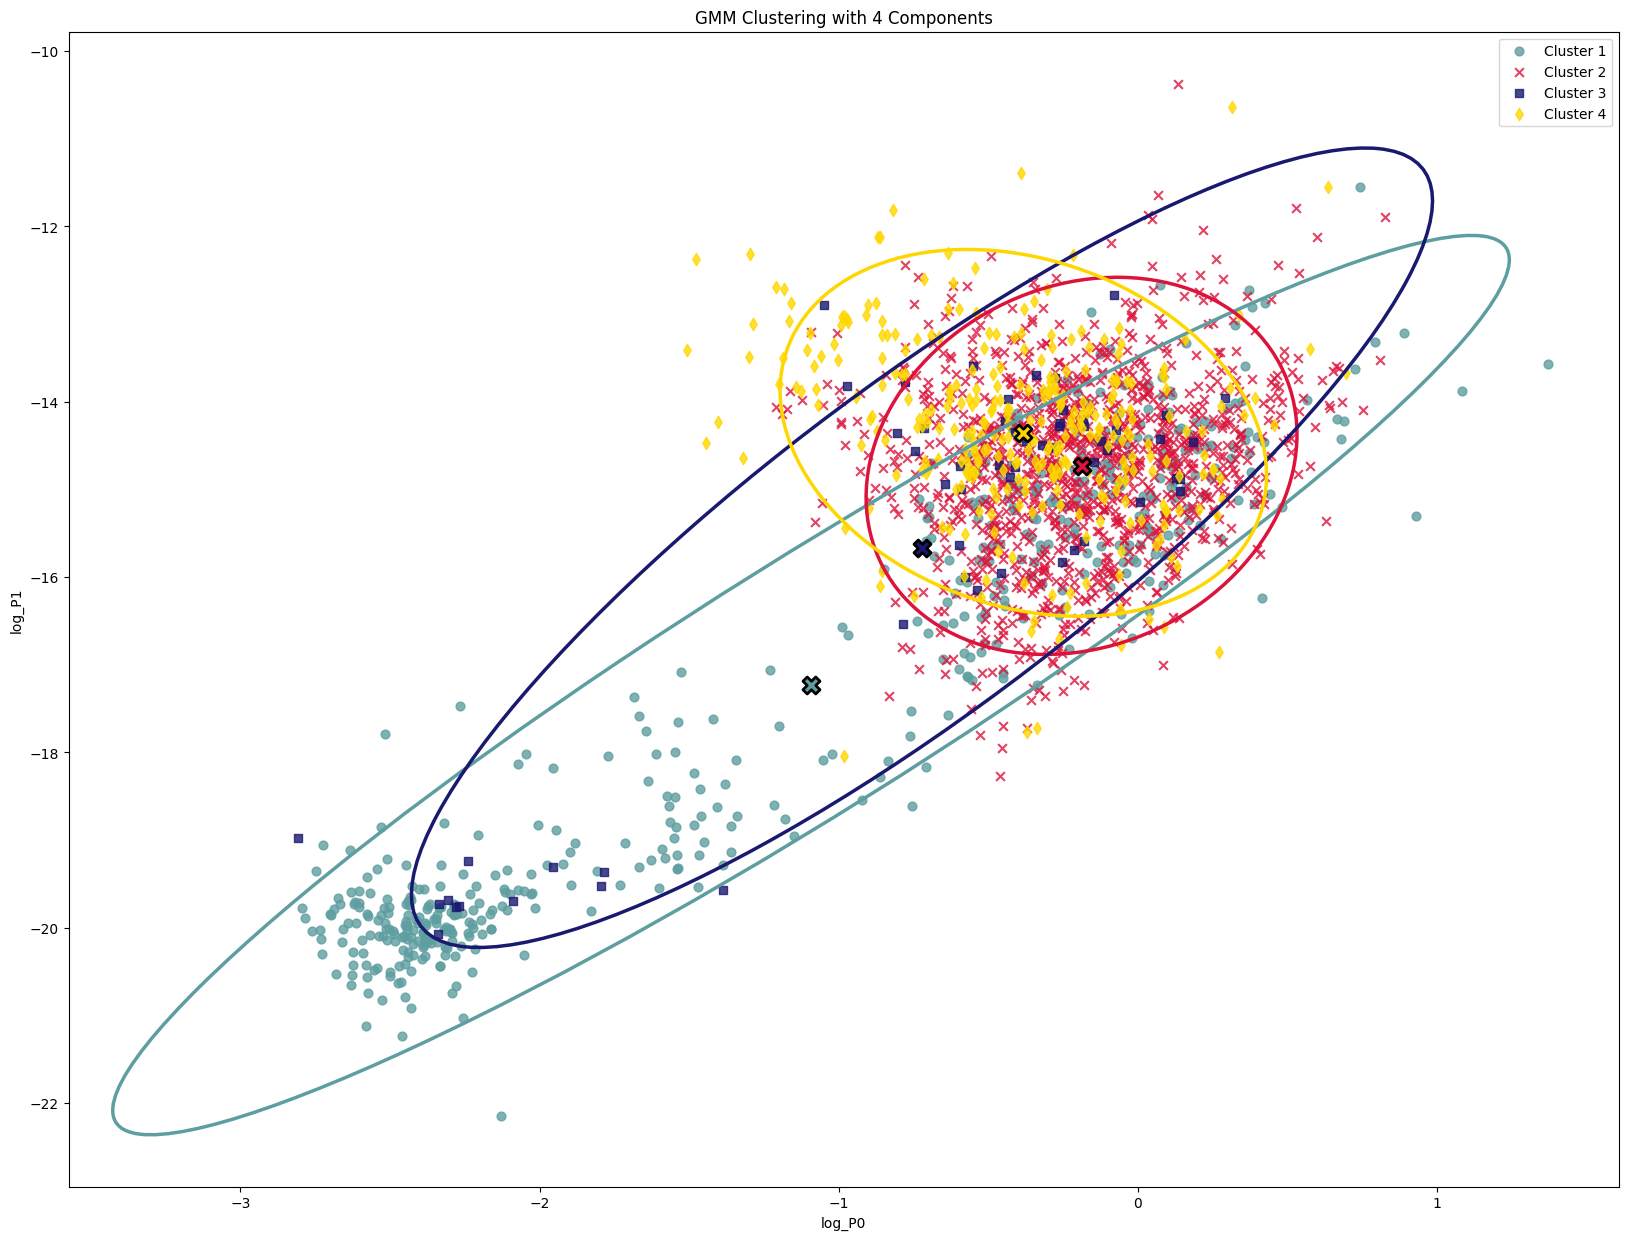

Silhouette Score: -0.100


In [87]:
labels_optimal = best_gmm.predict(X_1)

cluster_styles = {
    0: {'color': 'cadetblue', 'marker': 'o'},
    1: {'color': 'crimson', 'marker': 'x'},
    2: {'color': 'midnightblue', 'marker': 's'},
    3: {'color': 'gold', 'marker': 'd'}

}


cluster_order = [ 0, 1, 2,3]


plt.figure(figsize=(20, 15))

for i in cluster_order:

    cluster_data = filtered_data[labels_optimal == i]



    style = cluster_styles.get(i)
    plt.scatter(cluster_data['log_P0'], cluster_data['log_P1'],
                color=style['color'], marker=style['marker'],
                s=40, label=f'Cluster {i+1}', alpha=0.8)


for i in range(n_components):
    style = cluster_styles.get(i)
    plt.scatter(best_gmm.means_[i, 0], best_gmm.means_[i, 1],
                color=style['color'], marker='X', s=150, edgecolors='k', linewidth=2, zorder=5)

def plot_gmm_ellipses(gmm, ax):
    for i, (mean, covar) in enumerate(zip(gmm.means_, gmm.covariances_)):
        if covar.shape == (4, 4):
            covar_2d = covar[:2, :2]
            mean_2d = mean[:2]
            v, w = np.linalg.eigh(covar_2d)
            v = 3.0 * np.sqrt(2.0) * np.sqrt(v)
            u = w[0] / np.linalg.norm(w[0])

            angle = np.arctan2(u[1], u[0])
            angle = 180.0 * angle / np.pi


            ell = Ellipse(mean_2d, v[0], v[1], 180.0 + angle,
                          edgecolor=cluster_styles.get(i)['color'],
                          facecolor='None', linewidth=2.5)
            ax.add_patch(ell)


ax = plt.gca()
plot_gmm_ellipses(best_gmm, ax)

plt.title(f'GMM Clustering with {n_components} Components')
plt.xlabel('log_P0')
plt.ylabel('log_P1')
plt.legend()
plt.show()
silhouette_avg = silhouette_score(X_1, labels_optimal)
print(f'Silhouette Score: {silhouette_avg:.3f}')

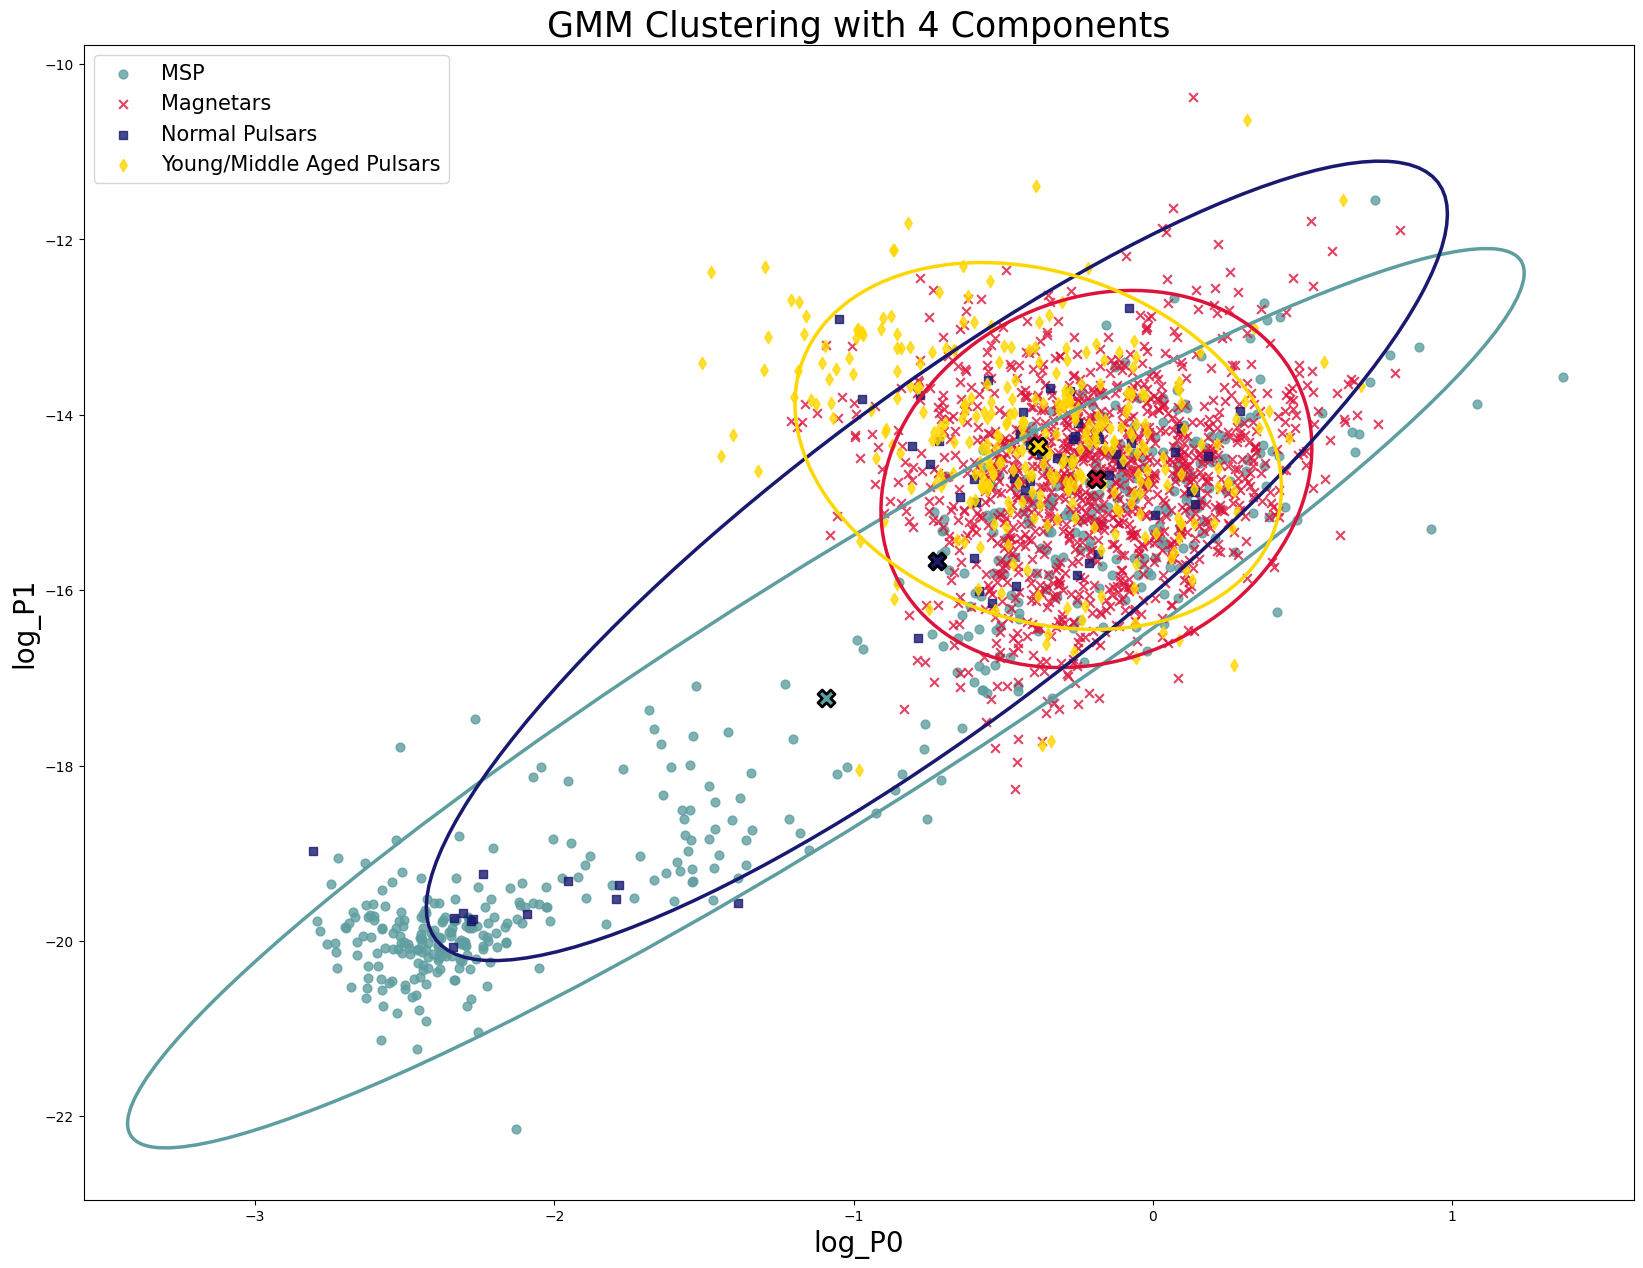

In [93]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.metrics import silhouette_score
import numpy as np

# Predict cluster labels using the best GMM model
labels_optimal = best_gmm.predict(X_1)

# Define styles for each cluster
cluster_styles = {
    0: {'color': 'cadetblue', 'marker': 'o'},
    1: {'color': 'crimson', 'marker': 'x'},
    2: {'color': 'midnightblue', 'marker': 's'},
    3: {'color': 'gold', 'marker': 'd'}
}

# Define cluster names
cluster_names = ['MSP','Magnetars', 'Normal Pulsars',  'Young/Middle Aged Pulsars']

# Create a new figure
plt.figure(figsize=(20, 15))

# Plot each cluster with its respective style
for i in np.unique(labels_optimal):
    cluster_data = X_1[labels_optimal == i]
    style = cluster_styles.get(i)
    plt.scatter(cluster_data['log_P0'], cluster_data['log_P1'],
                color=style['color'], marker=style['marker'],
                s=40, label=f'{cluster_names[i]}', alpha=0.8)

# Plot centroids with X markers
for i in range(n_components):
    style = cluster_styles.get(i)
    plt.scatter(best_gmm.means_[i, 0], best_gmm.means_[i, 1],
                color=style['color'], marker='X', s=150, edgecolors='k', linewidth=2, zorder=5)

# Function to plot GMM ellipses
def plot_gmm_ellipses(gmm, ax):
    for i, (mean, covar) in enumerate(zip(gmm.means_, gmm.covariances_)):
        if covar.shape == (4, 4):
            covar_2d = covar[:2, :2]
            mean_2d = mean[:2]
            v, w = np.linalg.eigh(covar_2d)
            v = 3.0 * np.sqrt(2.0) * np.sqrt(v)
            u = w[0] / np.linalg.norm(w[0])

            angle = np.arctan2(u[1], u[0])
            angle = 180.0 * angle / np.pi

            ell = Ellipse(mean_2d, v[0], v[1], 180.0 + angle,
                          edgecolor=cluster_styles.get(i)['color'],
                          facecolor='None', linewidth=2.5)
            ax.add_patch(ell)

# Plot GMM ellipses
ax = plt.gca()
plot_gmm_ellipses(best_gmm, ax)

# Add titles, labels, and legend
plt.title(f'GMM Clustering with {n_components} Components',fontsize=25)
plt.xlabel('log_P0',fontsize=20)
plt.ylabel('log_P1',fontsize=20)
plt.legend(fontsize=15)
plt.show()


Checking the training time for each algorithm

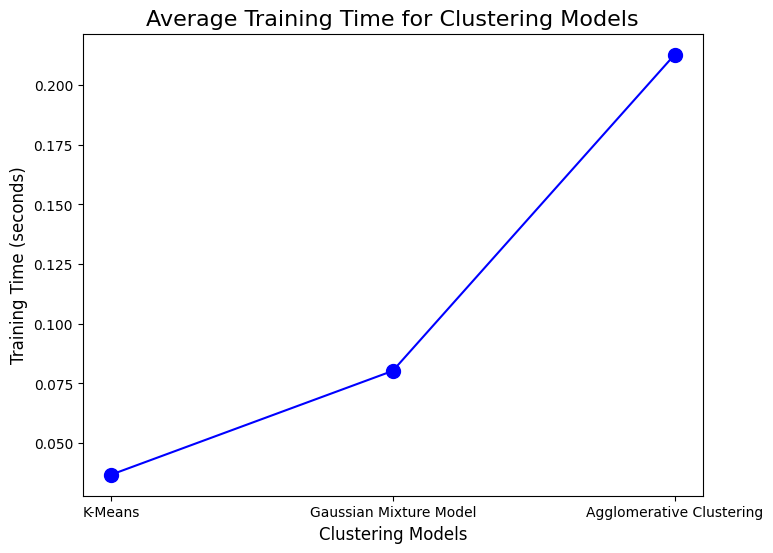

In [94]:
# Initialize time storage
train_times = []

# Measure training time for K-Means
start_time = time.time()
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_1)
train_times.append(time.time() - start_time)

# Measure training time for Gaussian Mixture Model (GMM)
start_time = time.time()
gmm = GaussianMixture(n_components=4, random_state=42)
gmm.fit(X_1)
train_times.append(time.time() - start_time)

# Measure training time for Agglomerative Clustering
start_time = time.time()
agg_clustering = AgglomerativeClustering(n_clusters=4)
agg_clustering.fit(X_1)
train_times.append(time.time() - start_time)

# Labels for the models
model_names = ['K-Means', 'Gaussian Mixture Model', 'Agglomerative Clustering']

# Plotting the training times
plt.figure(figsize=(8, 6))
plt.plot(model_names, train_times, marker='o',
         linestyle='-', color='blue', markersize=10)

plt.xlabel('Clustering Models', fontsize=12)
plt.ylabel('Training Time (seconds)', fontsize=12)
plt.title('Average Training Time for Clustering Models', fontsize=16)
plt.show()
